# Predicting the Bowling Average

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned dataset
file_path = "Data/Final_Bowling.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Player Name,Born,Batting Style,Bowling Style,Playing Role,Innings_ODI_batting,Innings_T20_batting,Innings_Test_batting,NO_ODI,NO_T20,...,T20_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,SpanStart_T20,Bowling Hand,AgeStart_ODI,AgeStart_Test,AgeStart_T20
0,A Dananjaya,1993-10-04,Left hand Bat,Spinner,Allrounder,30,16,10,6,8,...,33,6,SL,2012,2018,2012,Right Hand,18.819178,24.819178,18.819178
1,A Mishra,1982-11-24,Right hand Bat,Spinner,Bowler,11,1,32,3,0,...,10,22,IND,2003,2008,2010,Right Hand,20.679452,25.679452,27.679452
2,A Ndlovu,1996-01-26,Right hand Bat,Spinner,Bowler,0,5,4,0,3,...,12,2,ZIM,2019,2020,2019,Left Hand,23.506849,24.506849,23.506849
3,A Nel,1977-07-15,Right hand Bat,Pacer,Bowler,22,1,42,12,1,...,2,36,SA,2001,2001,2005,Right Hand,24.038356,24.038356,28.038356
4,A Nortje,1993-11-16,Right hand Bat,Pacer,Bowler,7,12,33,1,6,...,42,19,SA,2019,2019,2019,Right Hand,25.701370,25.701370,25.701370


In [4]:
df.columns

Index(['Player Name', 'Born', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Innings_ODI_batting', 'Innings_T20_batting', 'Innings_Test_batting',
       'NO_ODI', 'NO_T20', 'NO_Test', 'Runs_ODI_batting', 'Runs_T20_batting',
       'Runs_Test_batting', 'HS_ODI', 'HS_T20', 'HS_Test', 'Ave_ODI_batting',
       'Ave_T20_batting', 'Ave_Test_batting', 'BF_ODI', 'BF_T20',
       'SR_ODI_batting', 'SR_T20_batting', '100_ODI', '100_T20', '100_Test',
       '50_ODI', '50_T20', '50_Test', '0_ODI', '0_T20', '0_Test',
       'Innings_ODI_bowling', 'Innings_T20_bowling', 'Innings_Test_bowling',
       'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling', 'Runs_T20_bowling',
       'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_T20', 'Wickets_Test',
       'BBI_ODI', 'BBI_T20', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling',
       'Ave_Test_bowling', 'Econ_ODI', 'Econ_T20', 'Econ_Test',
       'SR_ODI_bowling', 'SR_T20_bowling', 'SR_Test_bowling', '4_ODI', '4_T20',
       '5_ODI', '5_T20', '5_Te

In [10]:
bowl_cols = ['Player Name', 'Bowling Style', 'Innings_ODI_bowling', 'Innings_T20_bowling', 'Innings_Test_bowling',
       'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling', 'Runs_T20_bowling',
       'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_T20', 'Wickets_Test',
       'BBI_ODI', 'BBI_T20', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling',
       'Ave_Test_bowling', 'Econ_ODI', 'Econ_T20', 'Econ_Test',
       'SR_ODI_bowling', 'SR_T20_bowling', 'SR_Test_bowling', '4_ODI', '4_T20',
       '5_ODI', '5_T20', '5_Test', '10_Test', 'ODI_Matches', 'T20_Matches',
       'Test_Matches', 'Country', 'SpanStart_ODI', 'SpanStart_Test',
       'SpanStart_T20', 'Bowling Hand', 'AgeStart_ODI', 'AgeStart_Test',
       'AgeStart_T20']

In [11]:
# Dropping Batting stats
df_bowl = df[bowl_cols]

## ODI Bowling Average

In [12]:
odi_cols = [column for column in df_bowl.columns if "ODI" in column and 'Ave_ODI_bowling' != column] 

In [13]:
odi_cols

['Innings_ODI_bowling',
 'Balls_ODI',
 'Runs_ODI_bowling',
 'Wickets_ODI',
 'BBI_ODI',
 'Econ_ODI',
 'SR_ODI_bowling',
 '4_ODI',
 '5_ODI',
 'ODI_Matches',
 'SpanStart_ODI',
 'AgeStart_ODI']

In [14]:
# Dropping Bowling stats
df_bowl_odi = df_bowl.drop(columns=odi_cols)

In [15]:
df_bowl_odi.columns

Index(['Player Name', 'Bowling Style', 'Innings_T20_bowling',
       'Innings_Test_bowling', 'Balls_Test', 'Runs_T20_bowling',
       'Runs_Test_bowling', 'Wickets_T20', 'Wickets_Test', 'BBI_T20',
       'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling',
       'Econ_T20', 'Econ_Test', 'SR_T20_bowling', 'SR_Test_bowling', '4_T20',
       '5_T20', '5_Test', '10_Test', 'T20_Matches', 'Test_Matches', 'Country',
       'SpanStart_Test', 'SpanStart_T20', 'Bowling Hand', 'AgeStart_Test',
       'AgeStart_T20'],
      dtype='object')

In [19]:
df_bowl_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player Name           361 non-null    object 
 1   Bowling Style         361 non-null    object 
 2   Innings_T20_bowling   361 non-null    int64  
 3   Innings_Test_bowling  361 non-null    int64  
 4   Balls_Test            361 non-null    int64  
 5   Runs_T20_bowling      361 non-null    int64  
 6   Runs_Test_bowling     361 non-null    int64  
 7   Wickets_T20           361 non-null    int64  
 8   Wickets_Test          361 non-null    int64  
 9   BBI_T20               361 non-null    float64
 10  BBI_Test              361 non-null    float64
 11  Ave_ODI_bowling       361 non-null    float64
 12  Ave_T20_bowling       361 non-null    float64
 13  Ave_Test_bowling      361 non-null    float64
 14  Econ_T20              361 non-null    float64
 15  Econ_Test             3

In [20]:
num_features = [feature for feature in df_bowl_odi.columns if df_bowl_odi[feature].dtype != 'O']
print(num_features)
df_bowl_odi[num_features].head()

['Innings_T20_bowling', 'Innings_Test_bowling', 'Balls_Test', 'Runs_T20_bowling', 'Runs_Test_bowling', 'Wickets_T20', 'Wickets_Test', 'BBI_T20', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling', 'Econ_T20', 'Econ_Test', 'SR_T20_bowling', 'SR_Test_bowling', '4_T20', '5_T20', '5_Test', '10_Test', 'T20_Matches', 'Test_Matches', 'SpanStart_Test', 'SpanStart_T20', 'AgeStart_Test', 'AgeStart_T20']


,Innings_T20_bowling,Innings_Test_bowling,Balls_Test,Runs_T20_bowling,Runs_Test_bowling,Wickets_T20,Wickets_Test,BBI_T20,BBI_Test,Ave_ODI_bowling,...,4_T20,5_T20,5_Test,10_Test,T20_Matches,Test_Matches,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,33,12,1385,965,819,30,33,0.083333,0.052174,29.56,...,0,0,4,0,33,6,2018,2012,24.819178,18.819178
1,10,40,5103,240,2715,16,76,0.125000,0.070423,23.60,...,0,0,1,0,10,22,2008,2010,25.679452,27.679452
2,12,2,420,289,277,4,2,0.071429,0.011765,80.00,...,0,0,0,0,12,2,2020,2019,24.506849,23.506849
3,2,69,7630,42,3919,2,123,0.105263,0.187500,27.68,...,0,0,3,1,2,36,2001,2005,24.038356,28.038356
4,41,32,3057,1016,1870,53,70,0.571429,0.107143,27.27,...,3,0,4,0,42,19,2019,2019,25.701370,25.701370


#### Discrete Features

In [21]:
discrete_features = [feature for feature in num_features if len(df_bowl_odi[feature].unique()) < 25]
print(discrete_features)

['4_T20', '5_T20', '5_Test', '10_Test', 'SpanStart_T20']


4_T20
0    0.761773
1    0.138504
2    0.044321
3    0.041551
4    0.011080
6    0.002770
Name: Ave_ODI_bowling, dtype: float64
4_T20
0    275
1     50
2     16
3     15
4      4
6      1
Name: count, dtype: int64


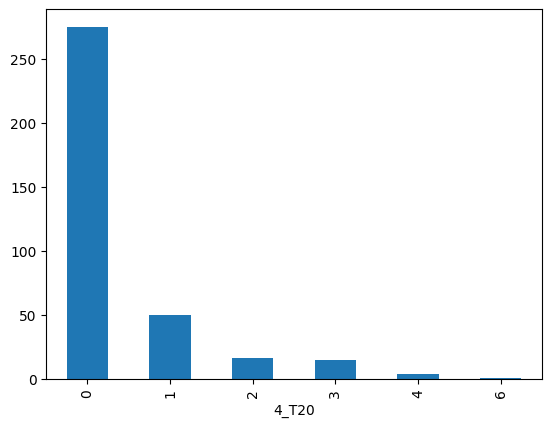

5_T20
0    0.933518
1    0.041551
2    0.024931
Name: Ave_ODI_bowling, dtype: float64
5_T20
0    337
1     15
2      9
Name: count, dtype: int64


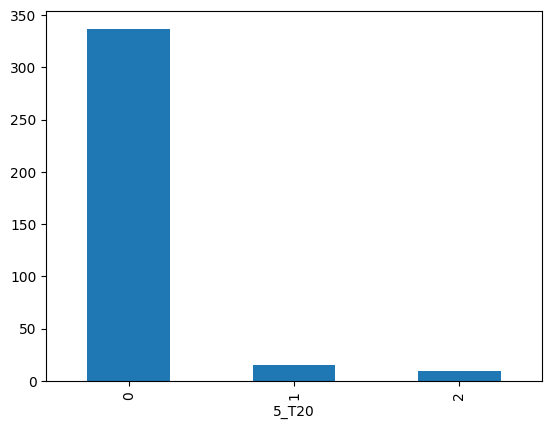

5_Test
0     0.537396
1     0.166205
2     0.074792
3     0.038781
4     0.044321
5     0.033241
6     0.011080
7     0.005540
8     0.011080
9     0.005540
10    0.013850
11    0.005540
12    0.016620
13    0.005540
14    0.005540
15    0.002770
16    0.002770
17    0.002770
19    0.002770
20    0.002770
24    0.002770
32    0.002770
34    0.002770
36    0.002770
Name: Ave_ODI_bowling, dtype: float64
5_Test
0     194
1      60
2      27
4      16
3      14
5      12
12      6
10      5
8       4
6       4
13      2
9       2
14      2
7       2
11      2
32      1
34      1
24      1
36      1
17      1
20      1
19      1
15      1
16      1
Name: count, dtype: int64


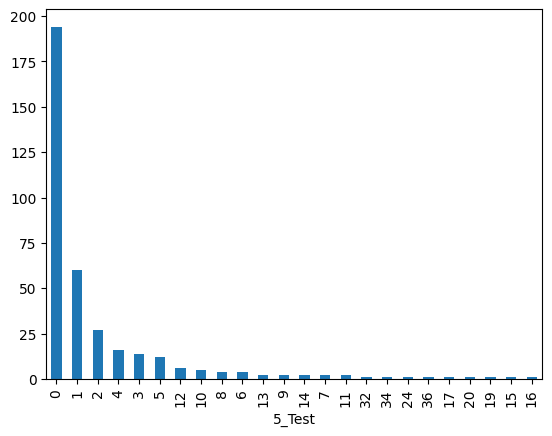

10_Test
0    0.869806
1    0.074792
2    0.027701
3    0.013850
4    0.005540
5    0.002770
8    0.002770
9    0.002770
Name: Ave_ODI_bowling, dtype: float64
10_Test
0    314
1     27
2     10
3      5
4      2
9      1
5      1
8      1
Name: count, dtype: int64


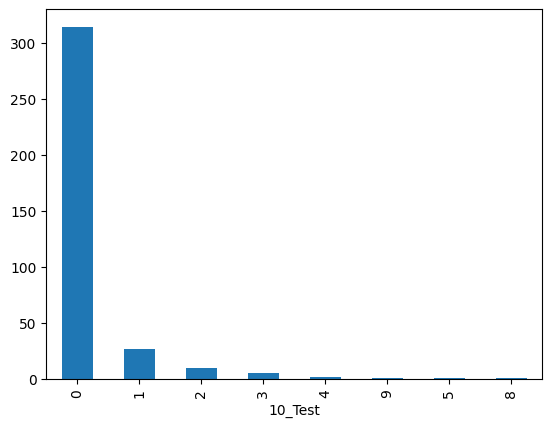

SpanStart_T20
2005    0.038781
2006    0.094183
2007    0.080332
2008    0.060942
2009    0.060942
2010    0.058172
2011    0.063712
2012    0.069252
2013    0.044321
2014    0.038781
2015    0.049861
2016    0.044321
2017    0.052632
2018    0.041551
2019    0.047091
2020    0.030471
2021    0.047091
2022    0.041551
2023    0.027701
2024    0.008310
Name: Ave_ODI_bowling, dtype: float64
SpanStart_T20
2006    34
2007    29
2012    25
2011    23
2009    22
2008    22
2010    21
2017    19
2015    18
2019    17
2021    17
2016    16
2013    16
2022    15
2018    15
2005    14
2014    14
2020    11
2023    10
2024     3
Name: count, dtype: int64


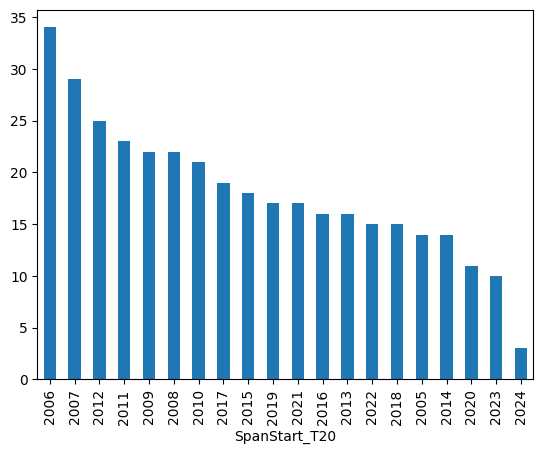

In [22]:
for feature in discrete_features:
    data = df_bowl_odi.copy() 
    print(data.groupby(feature)['Ave_ODI_bowling'].count() / len(data))
    print(data[feature].value_counts())
    data[feature].value_counts().plot.bar()
    plt.show()

4_T20
0    0.768377
1    0.143702
2    0.039746
3    0.036810
4    0.009035
6    0.002330
Name: Ave_ODI_bowling, dtype: float64


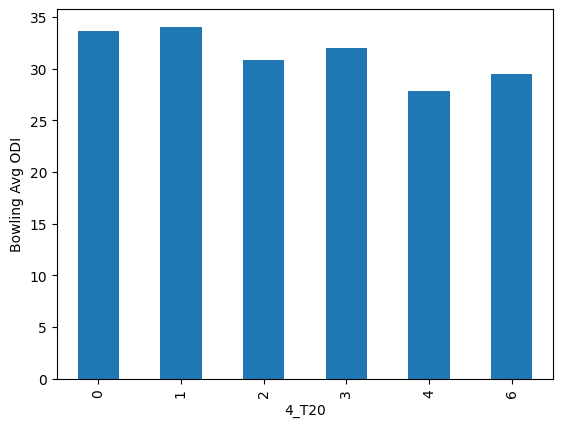

5_T20
0    0.943333
1    0.034862
2    0.021805
Name: Ave_ODI_bowling, dtype: float64


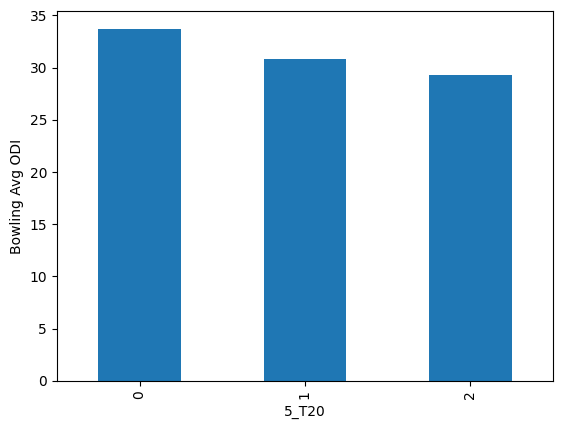

5_Test
0     0.551476
1     0.171814
2     0.075697
3     0.034836
4     0.041873
5     0.029606
6     0.010886
7     0.004795
8     0.010855
9     0.005169
10    0.010944
11    0.004898
12    0.013989
13    0.004744
14    0.004004
15    0.002660
16    0.003781
17    0.002191
19    0.002330
20    0.002378
24    0.003630
32    0.002306
34    0.002518
36    0.002620
Name: Ave_ODI_bowling, dtype: float64


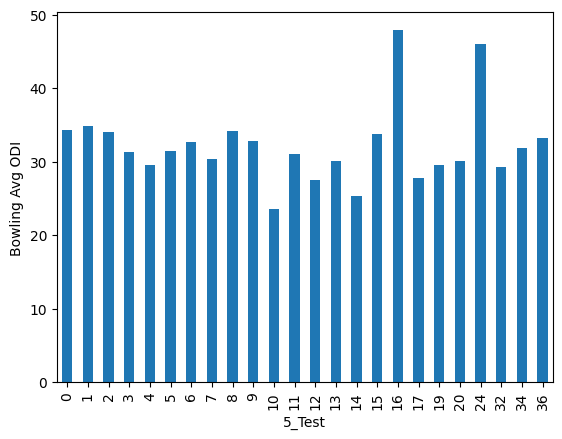

10_Test
0    0.880981
1    0.069617
2    0.023998
3    0.012650
4    0.003985
5    0.003630
8    0.002620
9    0.002518
Name: Ave_ODI_bowling, dtype: float64


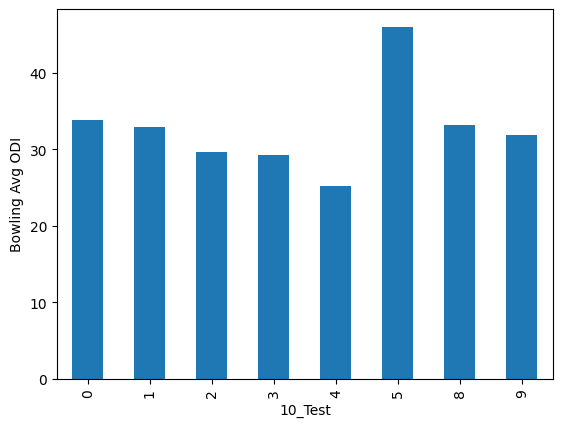

SpanStart_T20
2005    0.032051
2006    0.093371
2007    0.084471
2008    0.059072
2009    0.062442
2010    0.054316
2011    0.060307
2012    0.064865
2013    0.055005
2014    0.035819
2015    0.051756
2016    0.041739
2017    0.054482
2018    0.043272
2019    0.053282
2020    0.034797
2021    0.052208
2022    0.043247
2023    0.018884
2024    0.004614
Name: Ave_ODI_bowling, dtype: float64


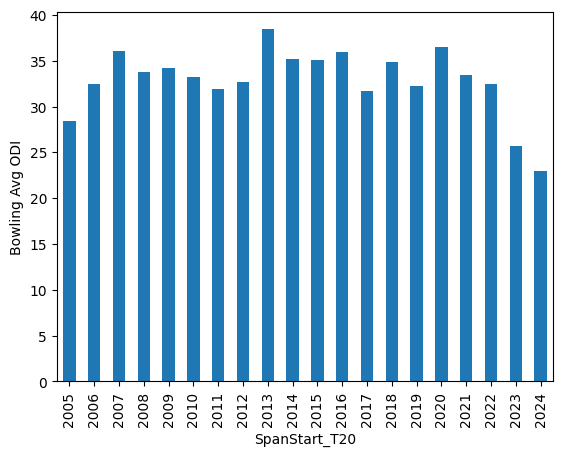

In [23]:
for feature in discrete_features:
    data = df_bowl_odi.copy()
    
    print(data.groupby(feature)['Ave_ODI_bowling'].sum() / data['Ave_ODI_bowling'].sum())
    data.groupby(feature)['Ave_ODI_bowling'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Bowling Avg ODI')
    plt.show()

#### Continuous Features

In [24]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(continuous_features)

['Innings_T20_bowling', 'Innings_Test_bowling', 'Balls_Test', 'Runs_T20_bowling', 'Runs_Test_bowling', 'Wickets_T20', 'Wickets_Test', 'BBI_T20', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling', 'Econ_T20', 'Econ_Test', 'SR_T20_bowling', 'SR_Test_bowling', 'T20_Matches', 'Test_Matches', 'SpanStart_Test', 'AgeStart_Test', 'AgeStart_T20']


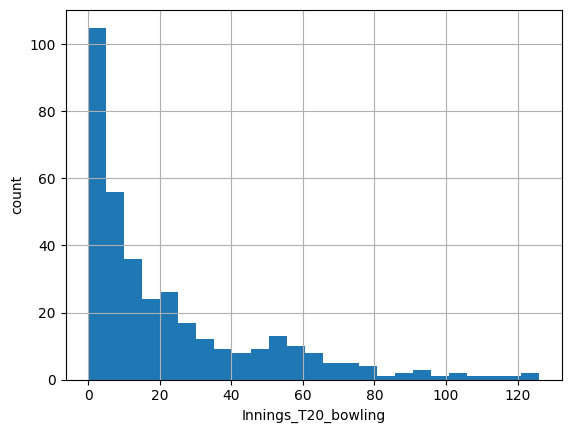

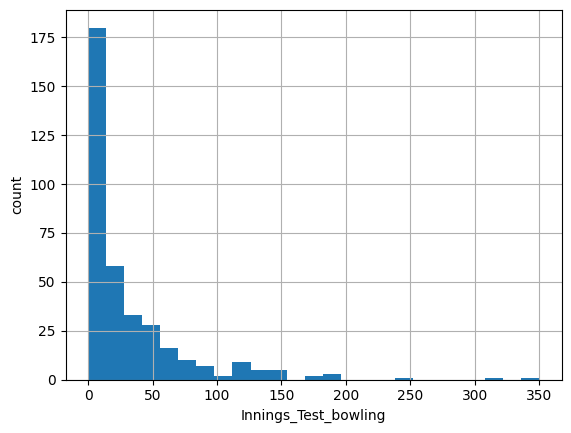

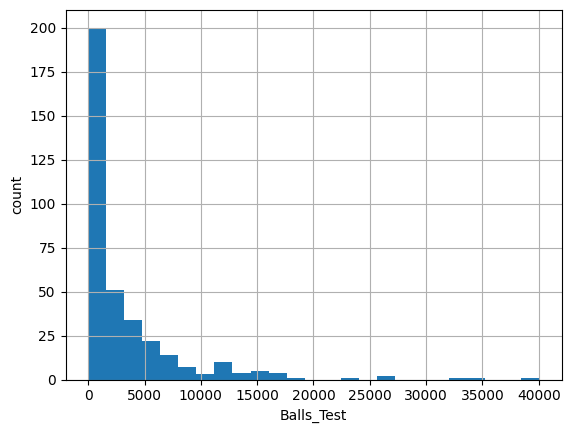

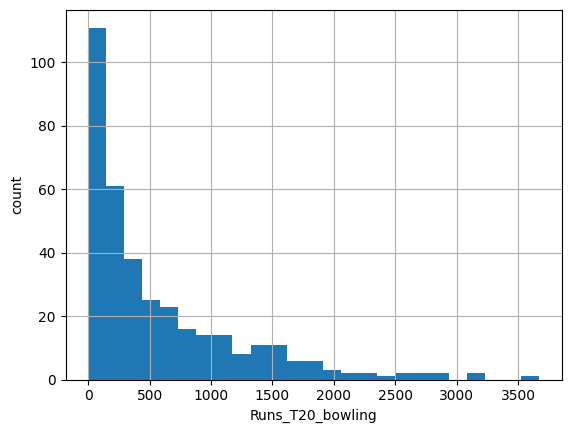

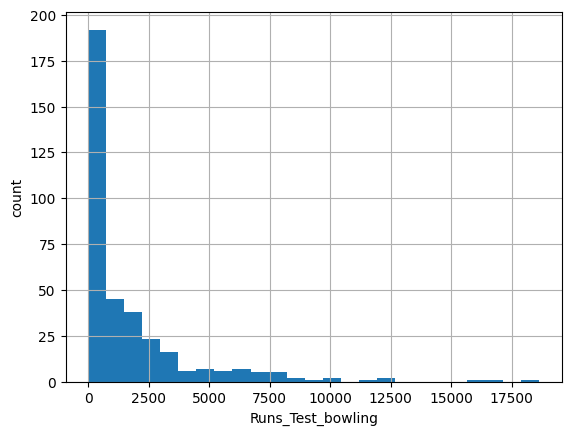

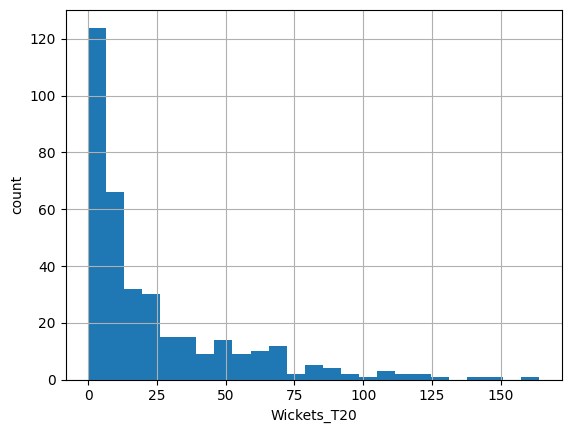

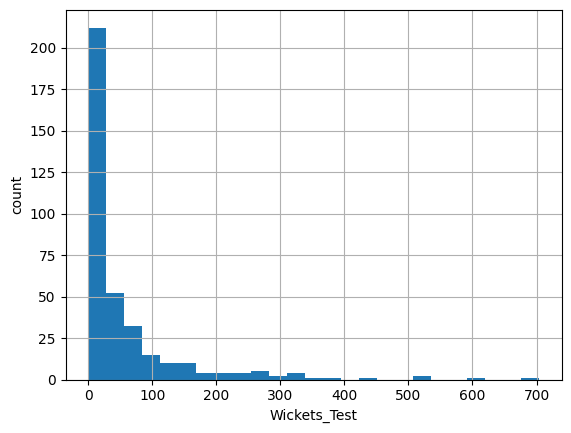

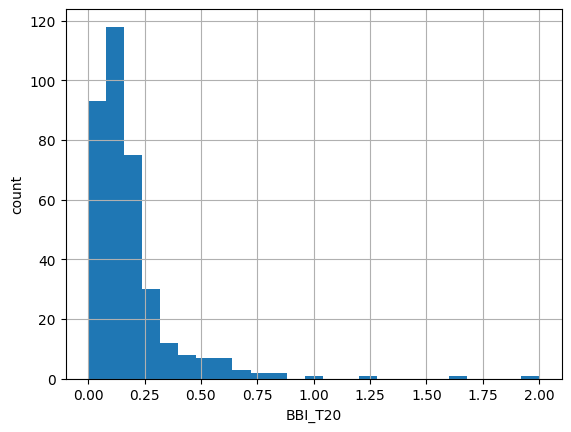

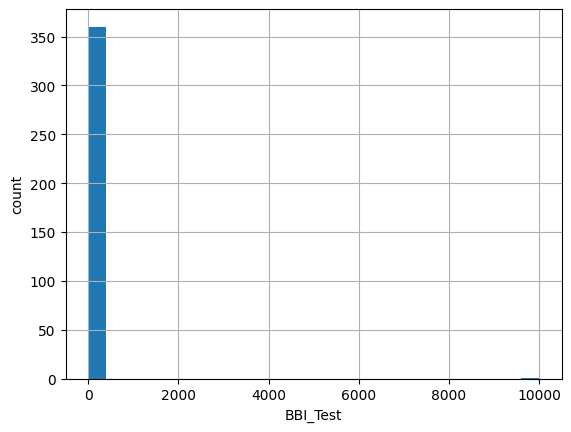

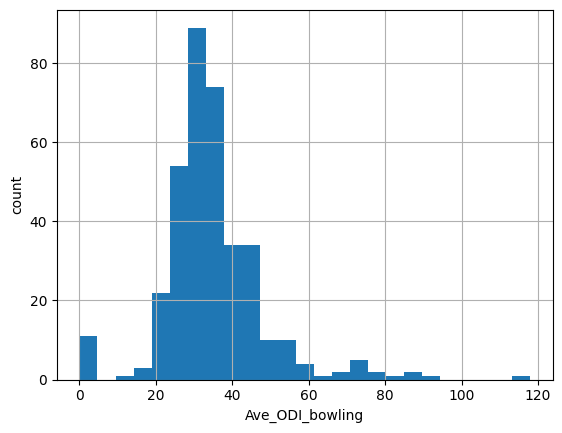

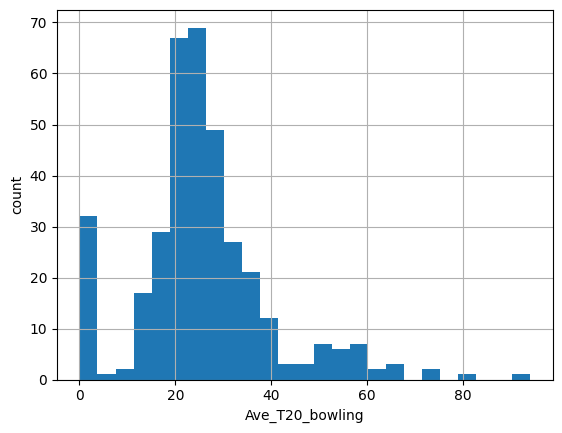

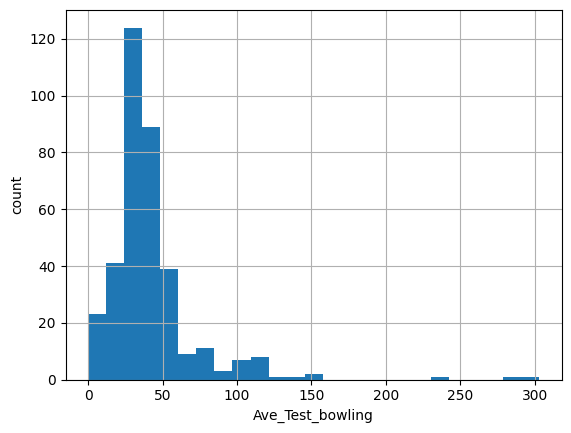

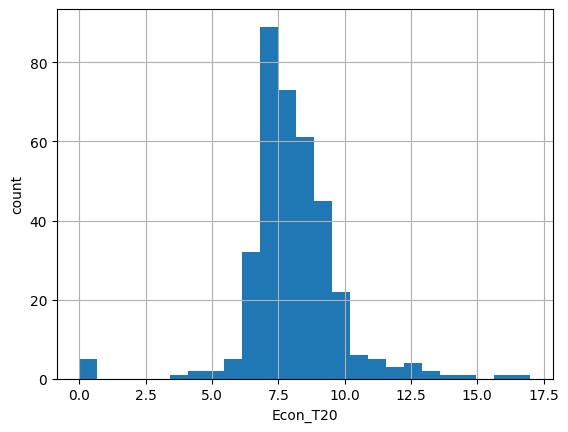

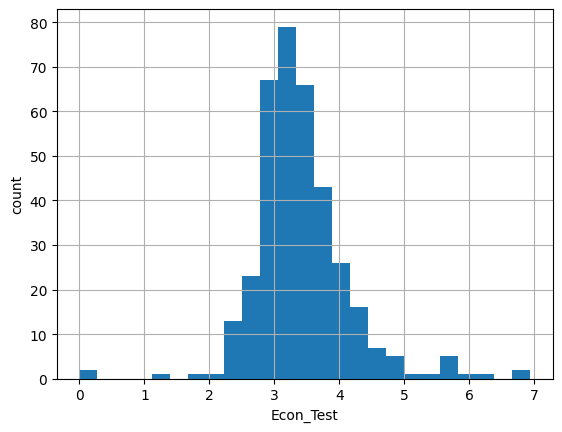

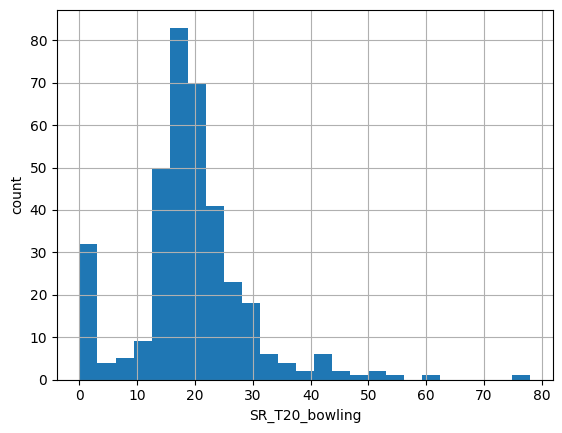

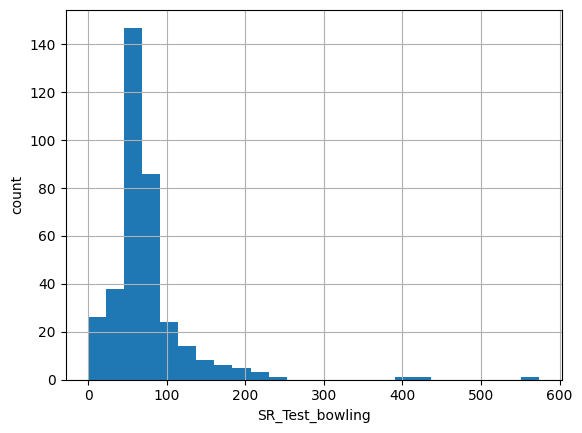

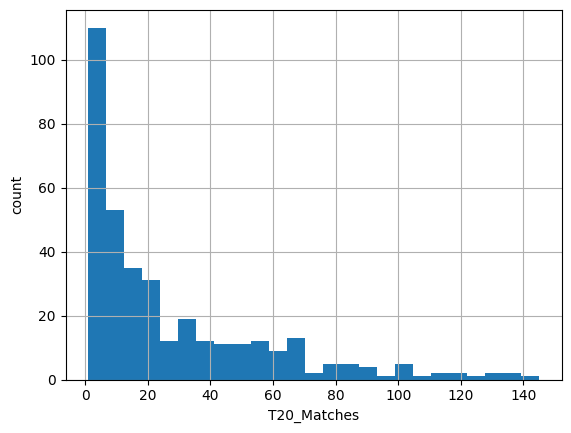

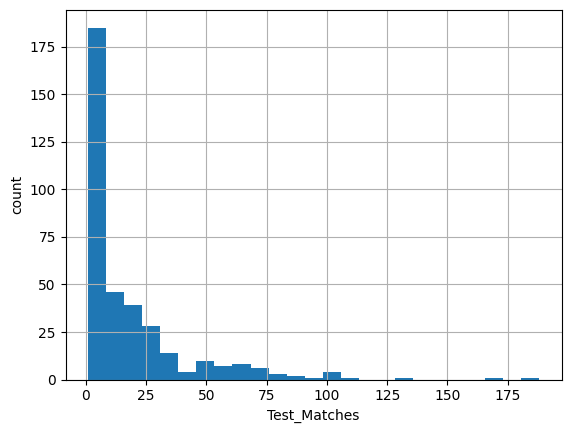

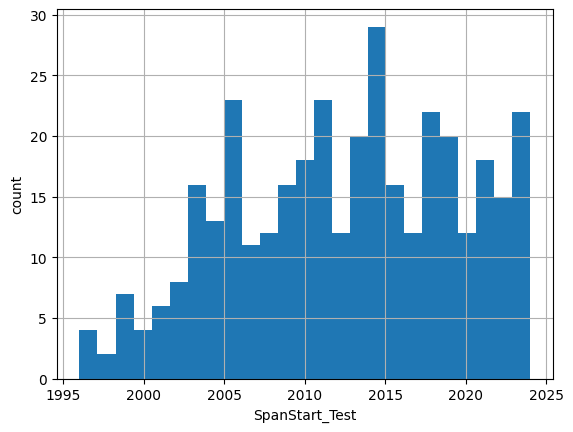

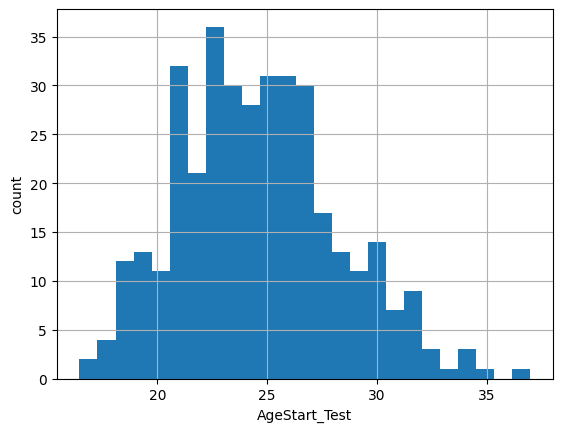

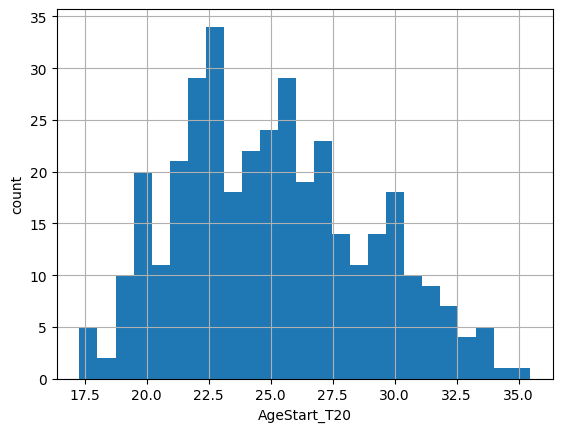

In [25]:
for feature in continuous_features:
    data = df_bowl_odi.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#### Categorical Features

In [26]:
cat_features = [feature for feature in df_bowl_odi.columns if feature not in num_features]
df_bowl_odi[cat_features].head()

,Player Name,Bowling Style,Country,Bowling Hand
0,A Dananjaya,Spinner,SL,Right Hand
1,A Mishra,Spinner,IND,Right Hand
2,A Ndlovu,Spinner,ZIM,Left Hand
3,A Nel,Pacer,SA,Right Hand
4,A Nortje,Pacer,SA,Right Hand


In [27]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df_bowl_odi[feature].unique())))

Player Name: 361 categories
Bowling Style: 2 categories
Country: 12 categories
Bowling Hand: 2 categories


In [28]:
cat_features.remove('Player Name')

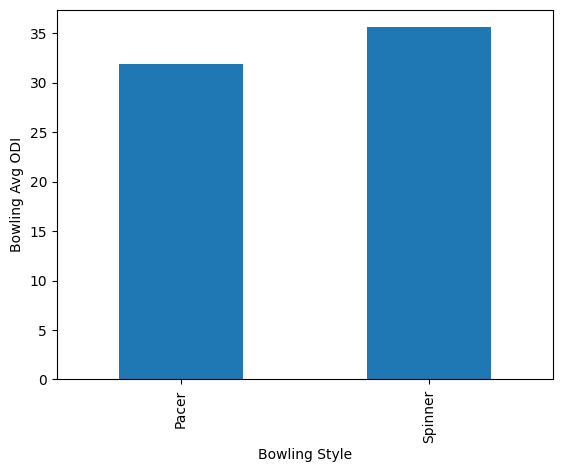

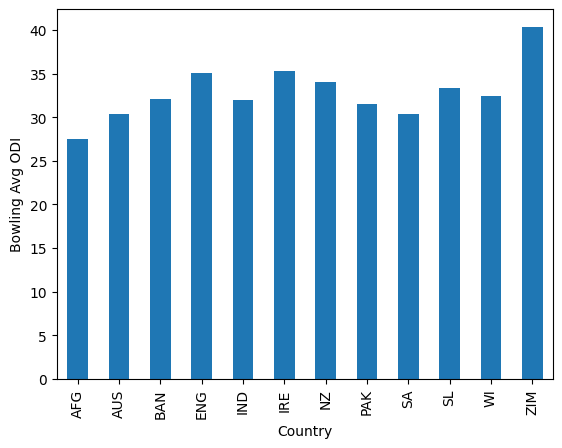

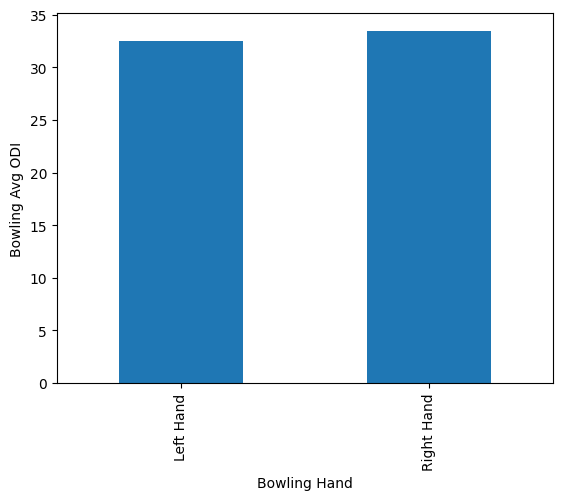

In [29]:
## relationship with Avg Runs

for feature in cat_features:
    data = df_bowl_odi.copy()
    
    data.groupby(feature)['Ave_ODI_bowling'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Bowling Avg ODI')
    plt.show()

#### Feature Engineering

In [30]:
dataset = df_bowl_odi.copy()
dataset.head()

,Player Name,Bowling Style,Innings_T20_bowling,Innings_Test_bowling,Balls_Test,Runs_T20_bowling,Runs_Test_bowling,Wickets_T20,Wickets_Test,BBI_T20,...,5_Test,10_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,Bowling Hand,AgeStart_Test,AgeStart_T20
0,A Dananjaya,Spinner,33,12,1385,965,819,30,33,0.083333,...,4,0,33,6,SL,2018,2012,Right Hand,24.819178,18.819178
1,A Mishra,Spinner,10,40,5103,240,2715,16,76,0.125000,...,1,0,10,22,IND,2008,2010,Right Hand,25.679452,27.679452
2,A Ndlovu,Spinner,12,2,420,289,277,4,2,0.071429,...,0,0,12,2,ZIM,2020,2019,Left Hand,24.506849,23.506849
3,A Nel,Pacer,2,69,7630,42,3919,2,123,0.105263,...,3,1,2,36,SA,2001,2005,Right Hand,24.038356,28.038356
4,A Nortje,Pacer,41,32,3057,1016,1870,53,70,0.571429,...,4,0,42,19,SA,2019,2019,Right Hand,25.701370,25.701370


##### Converting Categorical features to Numerical features

In [31]:
for feature in cat_features:
    ordinal_labels = dataset.groupby(feature)['Ave_ODI_bowling'].max().sort_values().index
    ordinal_dict = {k:i for i, k in enumerate(ordinal_labels, 0)}
    print(ordinal_dict)
    dataset[feature] = df_bowl_odi[feature].map(ordinal_dict)

{'Pacer': 0, 'Spinner': 1}
{'NZ': 0, 'WI': 1, 'AUS': 2, 'AFG': 3, 'BAN': 4, 'ENG': 5, 'SL': 6, 'IND': 7, 'SA': 8, 'ZIM': 9, 'PAK': 10, 'IRE': 11}
{'Left Hand': 0, 'Right Hand': 1}


In [32]:
dataset.drop(['Player Name'], axis = 1, inplace = True)
dataset.head()

,Bowling Style,Innings_T20_bowling,Innings_Test_bowling,Balls_Test,Runs_T20_bowling,Runs_Test_bowling,Wickets_T20,Wickets_Test,BBI_T20,BBI_Test,...,5_Test,10_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,Bowling Hand,AgeStart_Test,AgeStart_T20
0,1,33,12,1385,965,819,30,33,0.083333,0.052174,...,4,0,33,6,6,2018,2012,1,24.819178,18.819178
1,1,10,40,5103,240,2715,16,76,0.125000,0.070423,...,1,0,10,22,7,2008,2010,1,25.679452,27.679452
2,1,12,2,420,289,277,4,2,0.071429,0.011765,...,0,0,12,2,9,2020,2019,0,24.506849,23.506849
3,0,2,69,7630,42,3919,2,123,0.105263,0.187500,...,3,1,2,36,8,2001,2005,1,24.038356,28.038356
4,0,41,32,3057,1016,1870,53,70,0.571429,0.107143,...,4,0,42,19,8,2019,2019,1,25.701370,25.701370


In [33]:
dataset.to_csv('Data/Final/odi_bowl_processed_data.csv', index = False)

#### Modelling

In [34]:
df = pd.read_csv('Data/Final/odi_bowl_processed_data.csv')
df.head()

,Bowling Style,Innings_T20_bowling,Innings_Test_bowling,Balls_Test,Runs_T20_bowling,Runs_Test_bowling,Wickets_T20,Wickets_Test,BBI_T20,BBI_Test,...,5_Test,10_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,Bowling Hand,AgeStart_Test,AgeStart_T20
0,1,33,12,1385,965,819,30,33,0.083333,0.052174,...,4,0,33,6,6,2018,2012,1,24.819178,18.819178
1,1,10,40,5103,240,2715,16,76,0.125000,0.070423,...,1,0,10,22,7,2008,2010,1,25.679452,27.679452
2,1,12,2,420,289,277,4,2,0.071429,0.011765,...,0,0,12,2,9,2020,2019,0,24.506849,23.506849
3,0,2,69,7630,42,3919,2,123,0.105263,0.187500,...,3,1,2,36,8,2001,2005,1,24.038356,28.038356
4,0,41,32,3057,1016,1870,53,70,0.571429,0.107143,...,4,0,42,19,8,2019,2019,1,25.701370,25.701370


In [35]:
X = df.drop('Ave_ODI_bowling', axis = 1)

In [36]:
y = df['Ave_ODI_bowling']

##### Dropping with correlation

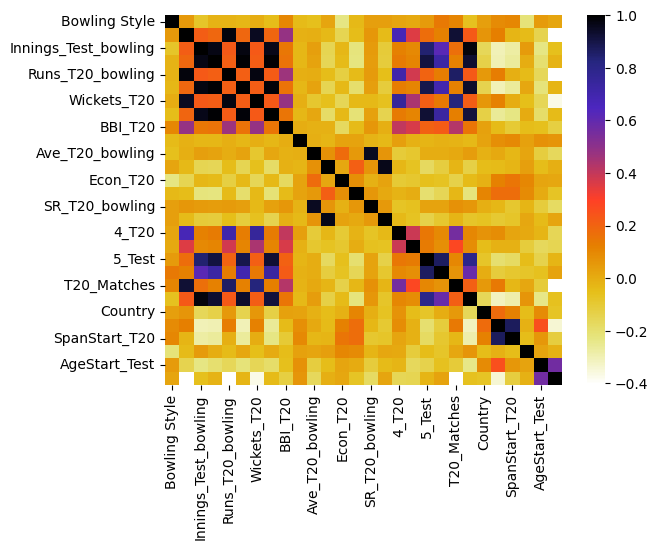

In [37]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [38]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [39]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [40]:
highly_correlated

['Balls_Test',
 'Runs_T20_bowling',
 'Runs_Test_bowling',
 'Wickets_T20',
 'Wickets_Test',
 'SR_T20_bowling',
 'SR_Test_bowling',
 '5_Test',
 '10_Test',
 'T20_Matches',
 'Test_Matches',
 'SpanStart_T20']

In [41]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [44]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [46]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [47]:
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 143.12926734760276
Random Forest R^2 Score: 0.107366299135918


In [48]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [49]:
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print(np.mean(scores))

-0.23233770683073318


##### Inferencing with Shap

In [50]:
import shap

/Users/henil08/College/Projects/Cricket-all-format/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

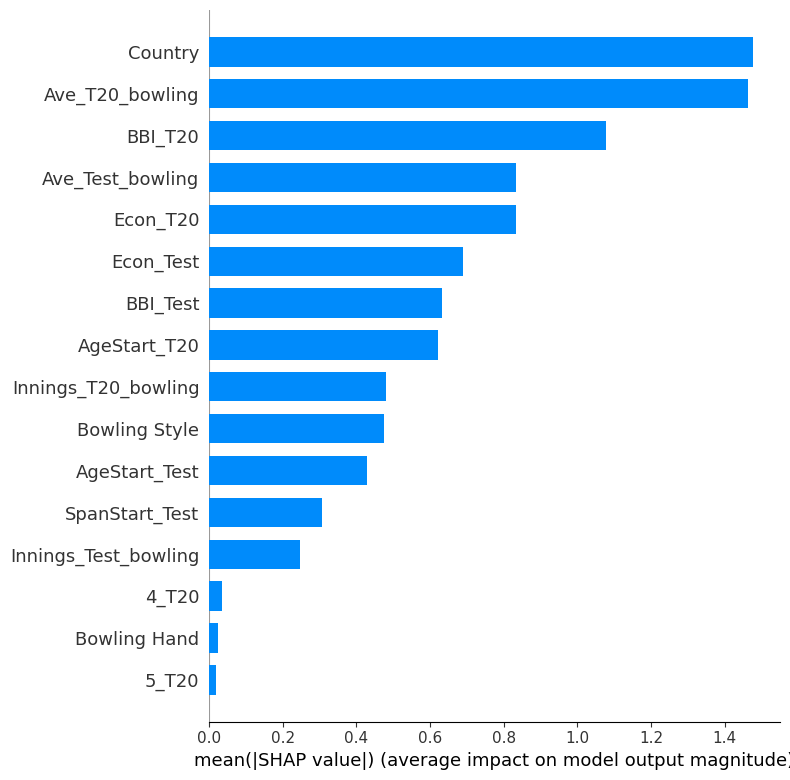

In [52]:
# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

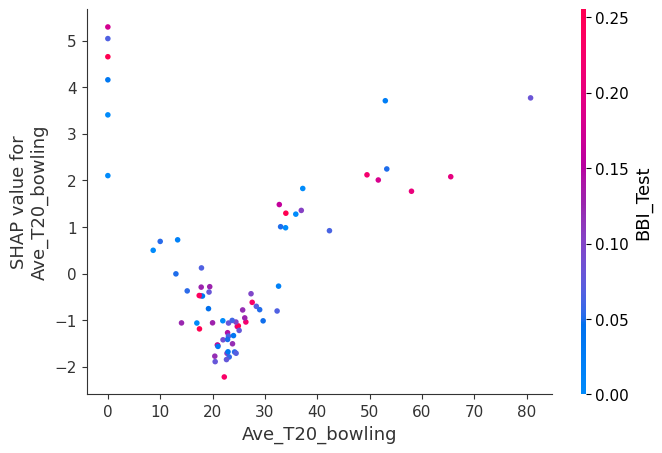

In [53]:
# Plot SHAP dependence plot for a specific feature
shap.dependence_plot("Ave_T20_bowling", shap_values, X_test) 

##### Hyperparameter Tuning

In [54]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [57]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [58]:
rf = RandomForestRegressor()

In [59]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [60]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': True}

In [62]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    # Evaluate the model
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mse))
    print('R2 = {:0.4f}'.format(r2))
    
    return r2

In [63]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 143.1293 degrees.
R2 = 0.1074


In [64]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 146.1045 degrees.
R2 = 0.0888


In [65]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -17.28%.


Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [68]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [69]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [70]:

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [71]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 152.2043 degrees.
R2 = 0.0508


In [72]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -52.71%.


## Test Bowling Average

In [73]:
test_cols = [column for column in df_bowl.columns if "Test" in column and 'Ave_Test_bowling' != column] 

In [74]:
test_cols

['Innings_Test_bowling',
 'Balls_Test',
 'Runs_Test_bowling',
 'Wickets_Test',
 'BBI_Test',
 'Econ_Test',
 'SR_Test_bowling',
 '5_Test',
 '10_Test',
 'Test_Matches',
 'SpanStart_Test',
 'AgeStart_Test']

In [75]:
# Dropping Bowling stats
df_bowl_test = df_bowl.drop(columns=test_cols)

In [76]:
df_bowl_test.columns

Index(['Player Name', 'Bowling Style', 'Innings_ODI_bowling',
       'Innings_T20_bowling', 'Balls_ODI', 'Runs_ODI_bowling',
       'Runs_T20_bowling', 'Wickets_ODI', 'Wickets_T20', 'BBI_ODI', 'BBI_T20',
       'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling', 'Econ_ODI',
       'Econ_T20', 'SR_ODI_bowling', 'SR_T20_bowling', '4_ODI', '4_T20',
       '5_ODI', '5_T20', 'ODI_Matches', 'T20_Matches', 'Country',
       'SpanStart_ODI', 'SpanStart_T20', 'Bowling Hand', 'AgeStart_ODI',
       'AgeStart_T20'],
      dtype='object')

In [77]:
df_bowl_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          361 non-null    object 
 1   Bowling Style        361 non-null    object 
 2   Innings_ODI_bowling  361 non-null    int64  
 3   Innings_T20_bowling  361 non-null    int64  
 4   Balls_ODI            361 non-null    int64  
 5   Runs_ODI_bowling     361 non-null    int64  
 6   Runs_T20_bowling     361 non-null    int64  
 7   Wickets_ODI          361 non-null    int64  
 8   Wickets_T20          361 non-null    int64  
 9   BBI_ODI              361 non-null    float64
 10  BBI_T20              361 non-null    float64
 11  Ave_ODI_bowling      361 non-null    float64
 12  Ave_T20_bowling      361 non-null    float64
 13  Ave_Test_bowling     361 non-null    float64
 14  Econ_ODI             361 non-null    float64
 15  Econ_T20             361 non-null    flo

In [78]:
num_features = [feature for feature in df_bowl_test.columns if df_bowl_test[feature].dtype != 'O']
print(num_features)
df_bowl_test[num_features].head()

['Innings_ODI_bowling', 'Innings_T20_bowling', 'Balls_ODI', 'Runs_ODI_bowling', 'Runs_T20_bowling', 'Wickets_ODI', 'Wickets_T20', 'BBI_ODI', 'BBI_T20', 'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling', 'Econ_ODI', 'Econ_T20', 'SR_ODI_bowling', 'SR_T20_bowling', '4_ODI', '4_T20', '5_ODI', '5_T20', 'ODI_Matches', 'T20_Matches', 'SpanStart_ODI', 'SpanStart_T20', 'AgeStart_ODI', 'AgeStart_T20']


,Innings_ODI_bowling,Innings_T20_bowling,Balls_ODI,Runs_ODI_bowling,Runs_T20_bowling,Wickets_ODI,Wickets_T20,BBI_ODI,BBI_T20,Ave_ODI_bowling,...,4_ODI,4_T20,5_ODI,5_T20,ODI_Matches,T20_Matches,SpanStart_ODI,SpanStart_T20,AgeStart_ODI,AgeStart_T20
0,38,33,1995,1715,965,58,30,0.206897,0.083333,29.56,...,2,0,2,0,40,33,2012,2012,18.819178,18.819178
1,34,10,1917,1511,240,64,16,0.125000,0.125000,23.60,...,2,0,2,0,36,10,2003,2010,20.679452,27.679452
2,2,12,102,80,289,1,4,0.034483,0.071429,80.00,...,0,0,0,0,2,12,2019,2019,23.506849,23.506849
3,76,2,3801,2935,42,106,2,0.111111,0.105263,27.68,...,3,0,1,0,79,2,2001,2005,24.038356,28.038356
4,21,41,1006,982,1016,36,53,0.078431,0.571429,27.27,...,3,3,0,0,22,42,2019,2019,25.701370,25.701370


#### Discrete Features

In [79]:
discrete_features = [feature for feature in num_features if len(df_bowl_test[feature].unique()) < 25]
print(discrete_features)

['4_ODI', '4_T20', '5_ODI', '5_T20', 'SpanStart_T20']


4_ODI
0     0.404432
1     0.180055
2     0.130194
3     0.102493
4     0.063712
5     0.036011
6     0.024931
7     0.016620
8     0.008310
9     0.005540
10    0.013850
11    0.008310
12    0.002770
14    0.002770
Name: Ave_Test_bowling, dtype: float64
4_ODI
0     146
1      65
2      47
3      37
4      23
5      13
6       9
7       6
10      5
8       3
11      3
9       2
14      1
12      1
Name: count, dtype: int64


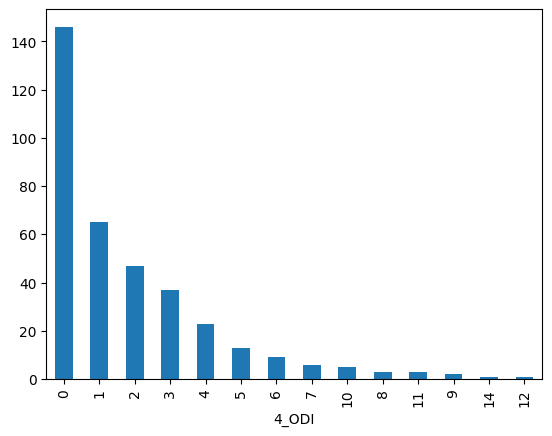

4_T20
0    0.761773
1    0.138504
2    0.044321
3    0.041551
4    0.011080
6    0.002770
Name: Ave_Test_bowling, dtype: float64
4_T20
0    275
1     50
2     16
3     15
4      4
6      1
Name: count, dtype: int64


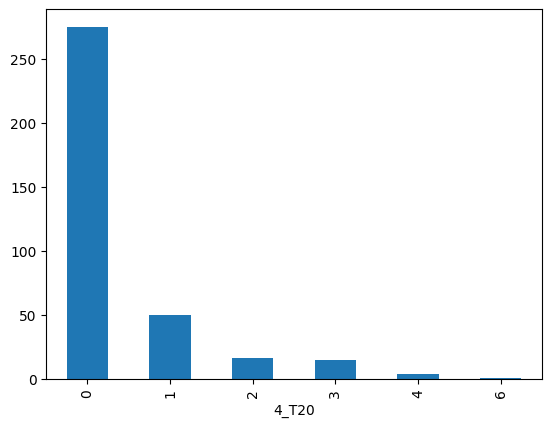

5_ODI
0    0.634349
1    0.216066
2    0.091413
3    0.027701
4    0.013850
5    0.005540
6    0.002770
8    0.002770
9    0.005540
Name: Ave_Test_bowling, dtype: float64
5_ODI
0    229
1     78
2     33
3     10
4      5
9      2
5      2
8      1
6      1
Name: count, dtype: int64


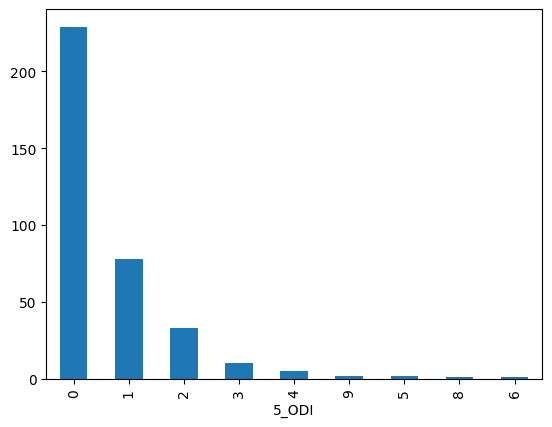

5_T20
0    0.933518
1    0.041551
2    0.024931
Name: Ave_Test_bowling, dtype: float64
5_T20
0    337
1     15
2      9
Name: count, dtype: int64


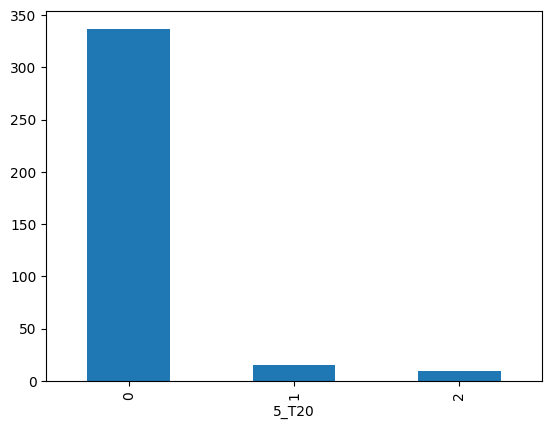

SpanStart_T20
2005    0.038781
2006    0.094183
2007    0.080332
2008    0.060942
2009    0.060942
2010    0.058172
2011    0.063712
2012    0.069252
2013    0.044321
2014    0.038781
2015    0.049861
2016    0.044321
2017    0.052632
2018    0.041551
2019    0.047091
2020    0.030471
2021    0.047091
2022    0.041551
2023    0.027701
2024    0.008310
Name: Ave_Test_bowling, dtype: float64
SpanStart_T20
2006    34
2007    29
2012    25
2011    23
2009    22
2008    22
2010    21
2017    19
2015    18
2019    17
2021    17
2016    16
2013    16
2022    15
2018    15
2005    14
2014    14
2020    11
2023    10
2024     3
Name: count, dtype: int64


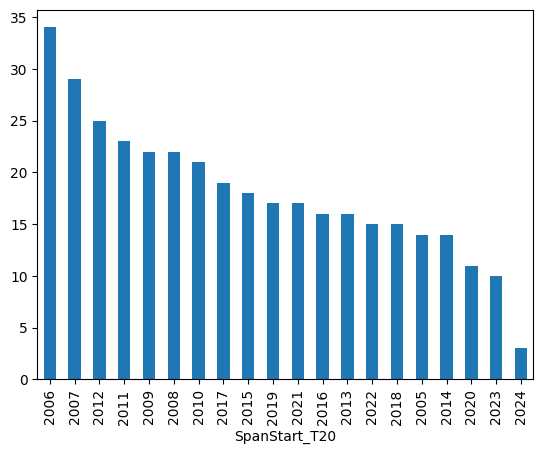

In [80]:
for feature in discrete_features:
    data = df_bowl_test.copy() 
    print(data.groupby(feature)['Ave_Test_bowling'].count() / len(data))
    print(data[feature].value_counts())
    data[feature].value_counts().plot.bar()
    plt.show()

4_ODI
0     0.416056
1     0.185595
2     0.140411
3     0.092233
4     0.065176
5     0.035024
6     0.018985
7     0.015080
8     0.007101
9     0.003700
10    0.010957
11    0.005819
12    0.001830
14    0.002033
Name: Ave_Test_bowling, dtype: float64


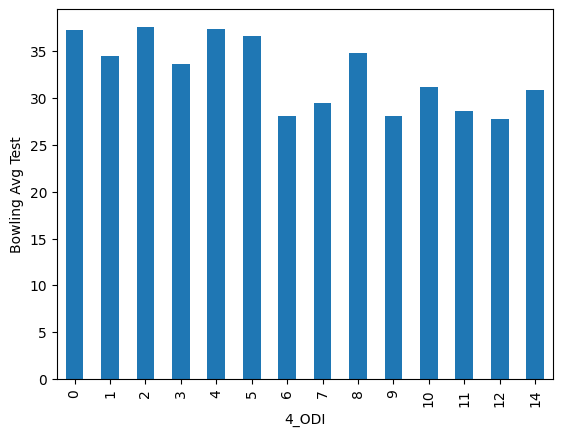

4_T20
0    0.764436
1    0.144942
2    0.038325
3    0.042141
4    0.008100
6    0.002056
Name: Ave_Test_bowling, dtype: float64


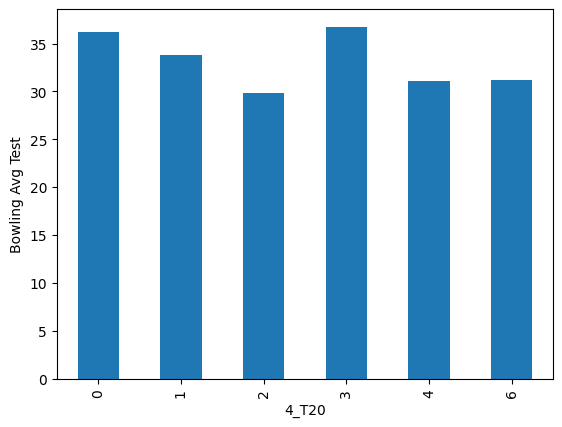

5_ODI
0    0.643993
1    0.226145
2    0.082317
3    0.019527
4    0.015903
5    0.004252
6    0.001814
8    0.002187
9    0.003863
Name: Ave_Test_bowling, dtype: float64


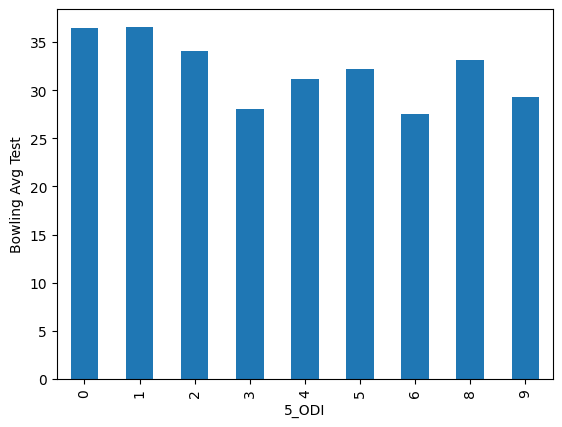

5_T20
0    0.947303
1    0.032995
2    0.019702
Name: Ave_Test_bowling, dtype: float64


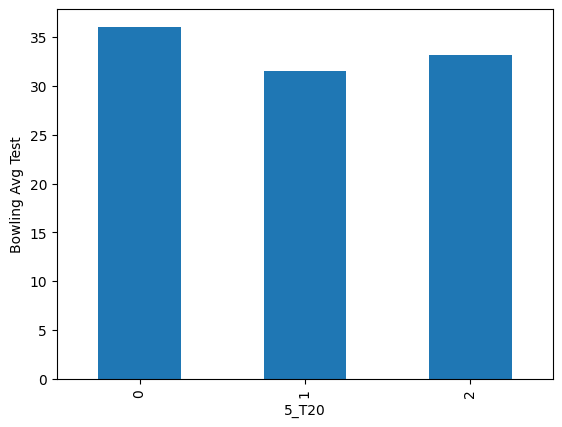

SpanStart_T20
2005    0.031155
2006    0.091319
2007    0.063625
2008    0.094363
2009    0.061336
2010    0.071783
2011    0.070136
2012    0.062375
2013    0.036221
2014    0.038845
2015    0.049896
2016    0.044895
2017    0.040698
2018    0.040734
2019    0.054025
2020    0.024733
2021    0.055898
2022    0.038920
2023    0.024402
2024    0.004642
Name: Ave_Test_bowling, dtype: float64


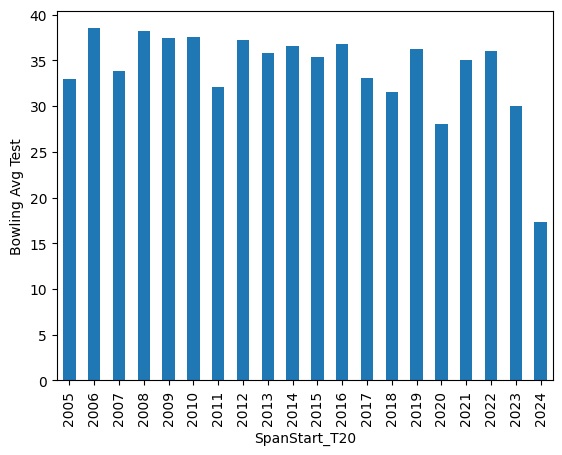

In [81]:
for feature in discrete_features:
    data = df_bowl_test.copy()
    
    print(data.groupby(feature)['Ave_Test_bowling'].sum() / data['Ave_Test_bowling'].sum())
    data.groupby(feature)['Ave_Test_bowling'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Bowling Avg Test')
    plt.show()

#### Continuous Features

In [82]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(continuous_features)

['Innings_ODI_bowling', 'Innings_T20_bowling', 'Balls_ODI', 'Runs_ODI_bowling', 'Runs_T20_bowling', 'Wickets_ODI', 'Wickets_T20', 'BBI_ODI', 'BBI_T20', 'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling', 'Econ_ODI', 'Econ_T20', 'SR_ODI_bowling', 'SR_T20_bowling', 'ODI_Matches', 'T20_Matches', 'SpanStart_ODI', 'AgeStart_ODI', 'AgeStart_T20']


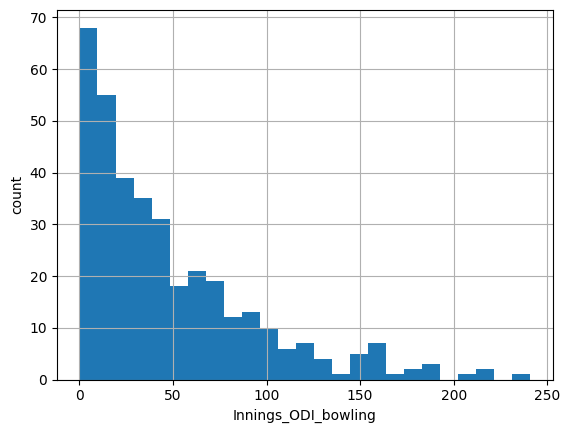

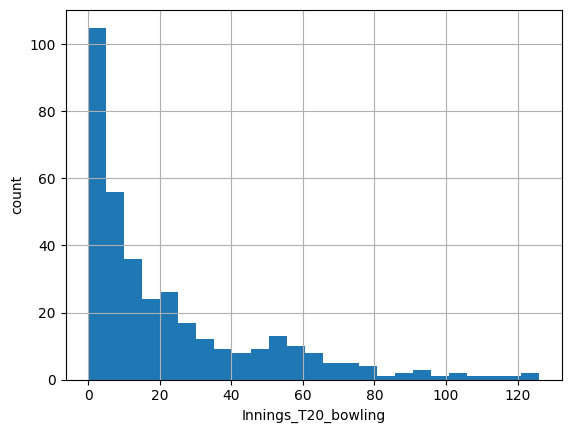

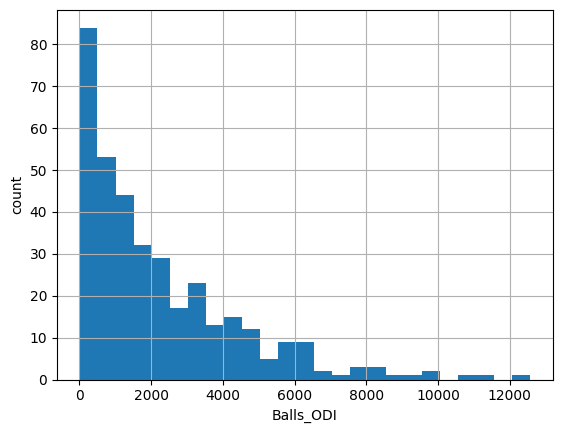

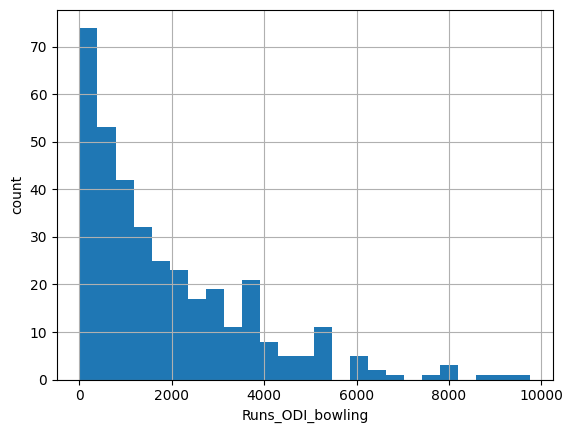

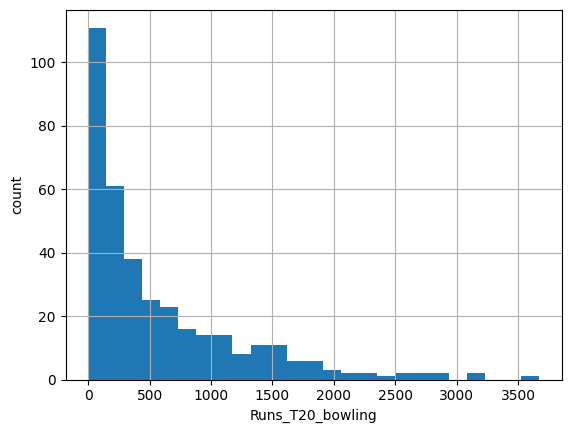

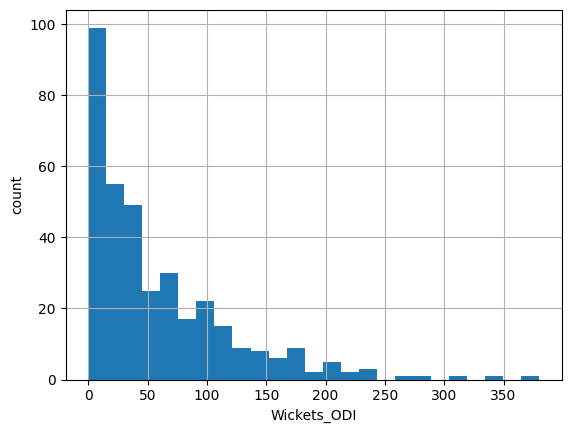

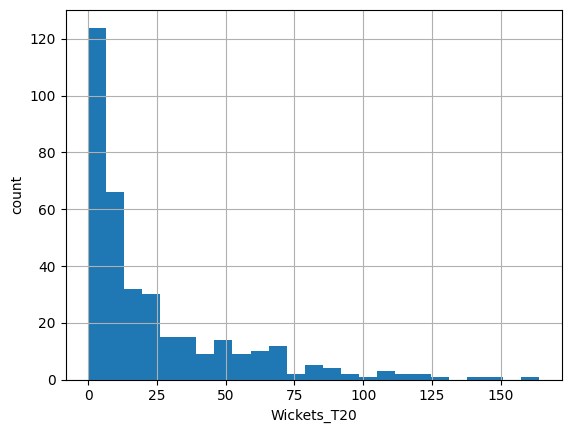

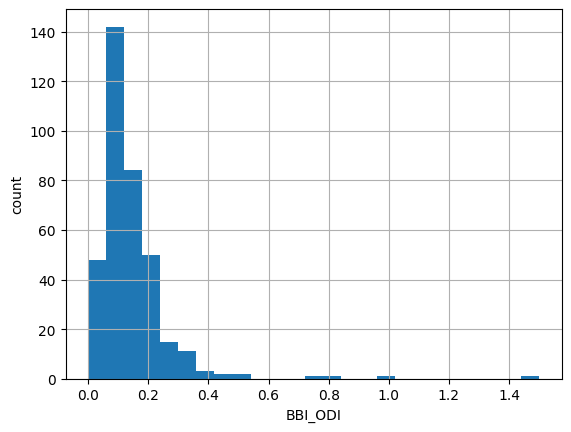

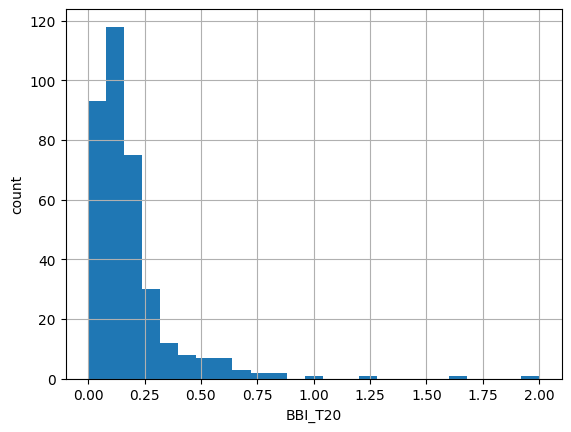

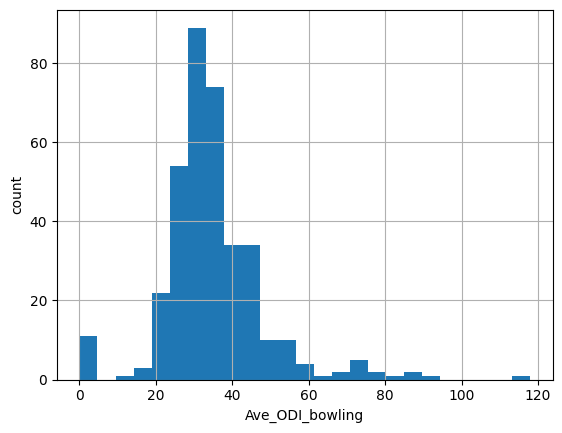

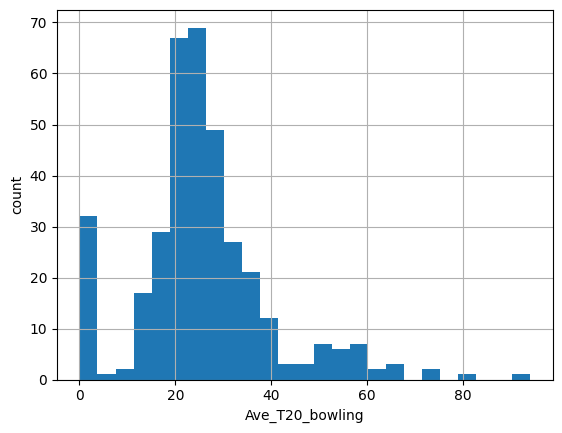

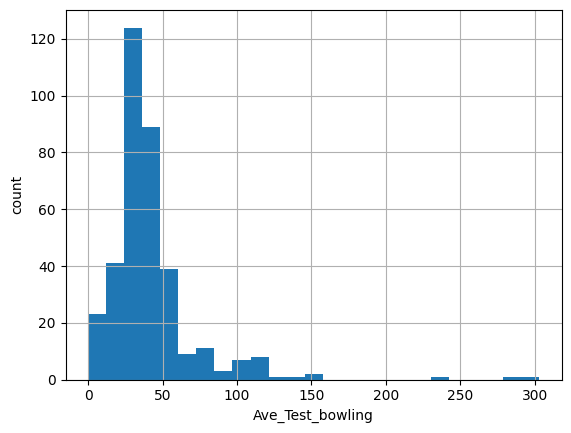

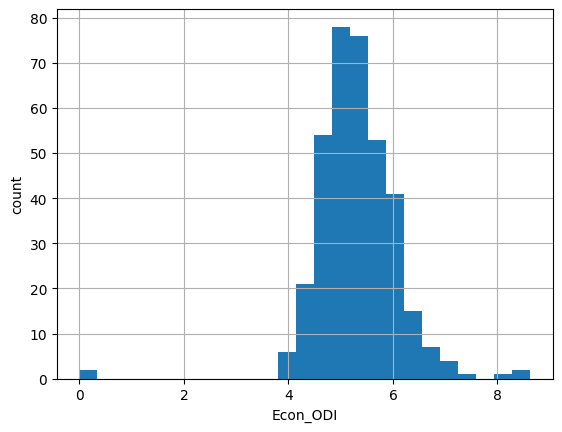

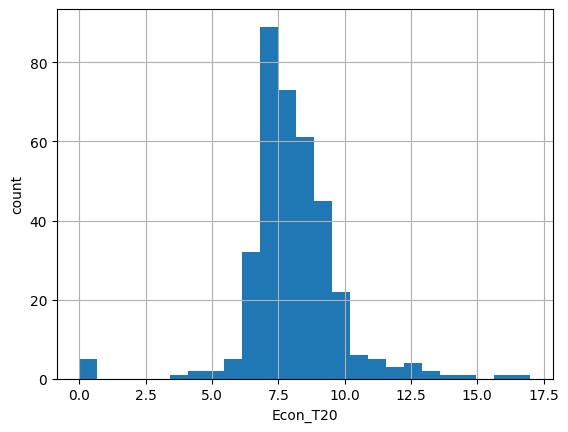

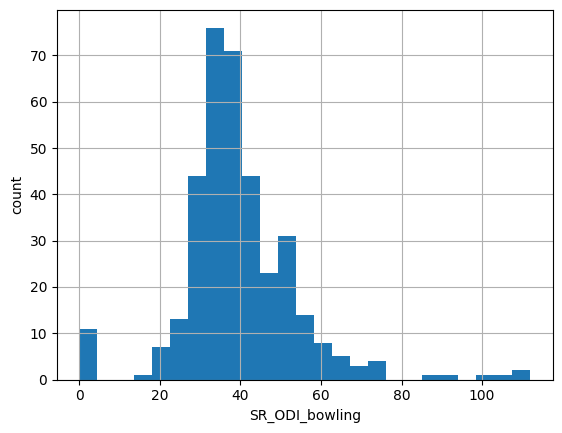

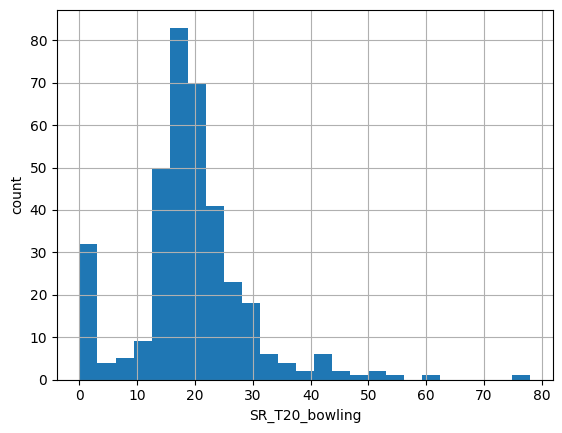

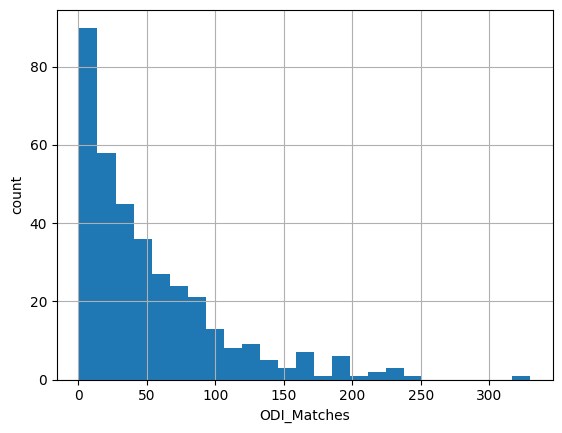

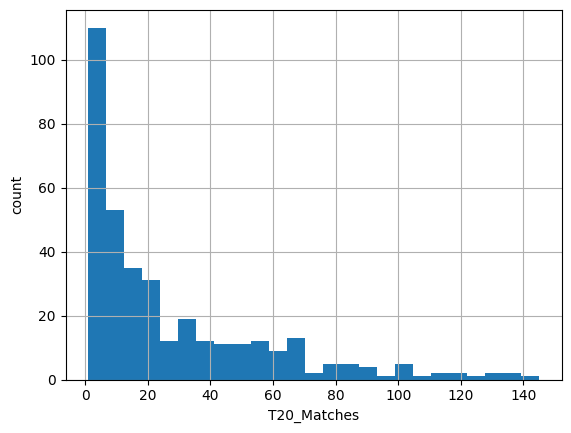

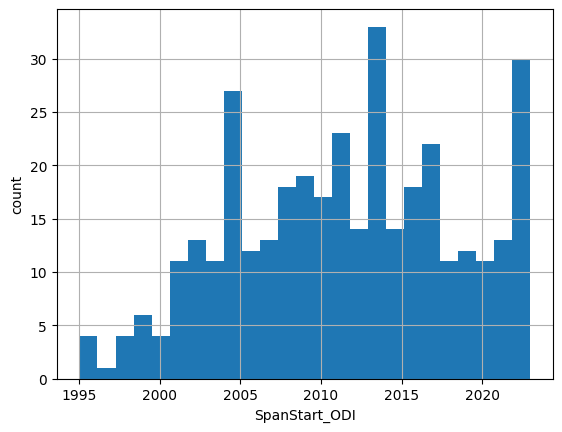

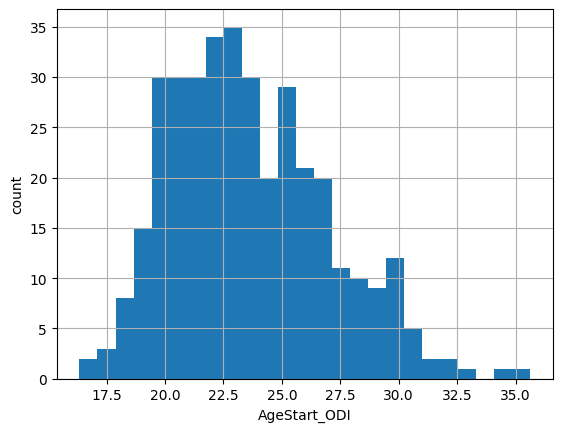

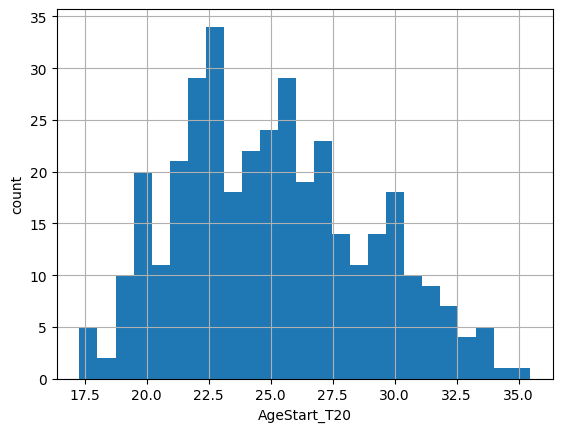

In [83]:
for feature in continuous_features:
    data = df_bowl_test.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#### Categorical Features

In [84]:
cat_features = [feature for feature in df_bowl_test.columns if feature not in num_features]
df_bowl_test[cat_features].head()

,Player Name,Bowling Style,Country,Bowling Hand
0,A Dananjaya,Spinner,SL,Right Hand
1,A Mishra,Spinner,IND,Right Hand
2,A Ndlovu,Spinner,ZIM,Left Hand
3,A Nel,Pacer,SA,Right Hand
4,A Nortje,Pacer,SA,Right Hand


In [85]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df_bowl_test[feature].unique())))

Player Name: 361 categories
Bowling Style: 2 categories
Country: 12 categories
Bowling Hand: 2 categories


In [86]:
cat_features.remove('Player Name')

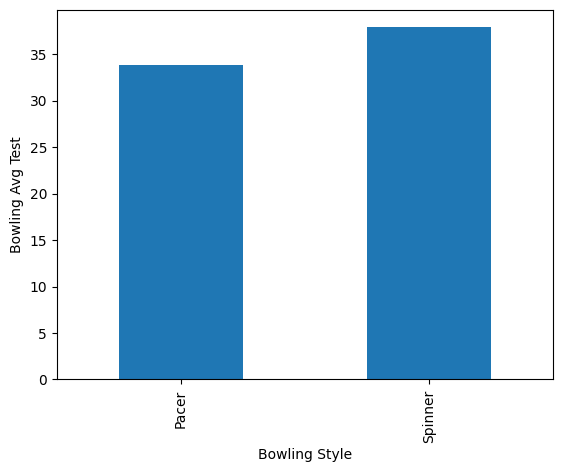

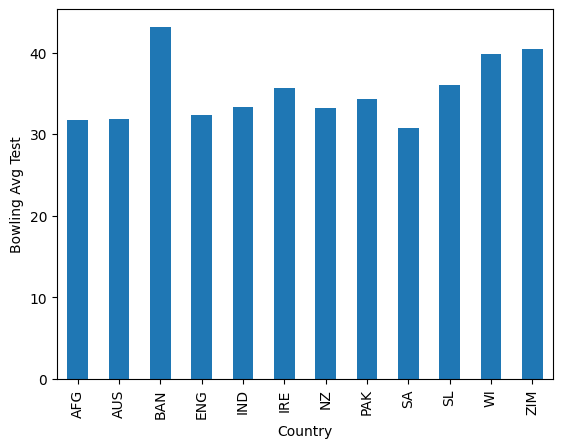

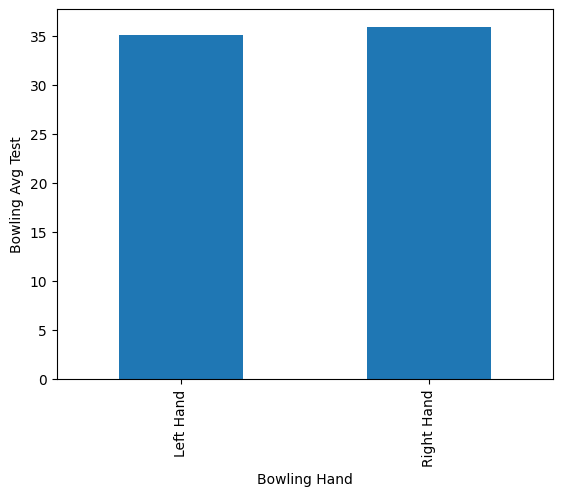

In [87]:
## relationship with Avg Runs

for feature in cat_features:
    data = df_bowl_test.copy()
    
    data.groupby(feature)['Ave_Test_bowling'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Bowling Avg Test')
    plt.show()

#### Feature Engineering

In [88]:
dataset = df_bowl_test.copy()
dataset.head()

,Player Name,Bowling Style,Innings_ODI_bowling,Innings_T20_bowling,Balls_ODI,Runs_ODI_bowling,Runs_T20_bowling,Wickets_ODI,Wickets_T20,BBI_ODI,...,5_ODI,5_T20,ODI_Matches,T20_Matches,Country,SpanStart_ODI,SpanStart_T20,Bowling Hand,AgeStart_ODI,AgeStart_T20
0,A Dananjaya,Spinner,38,33,1995,1715,965,58,30,0.206897,...,2,0,40,33,SL,2012,2012,Right Hand,18.819178,18.819178
1,A Mishra,Spinner,34,10,1917,1511,240,64,16,0.125000,...,2,0,36,10,IND,2003,2010,Right Hand,20.679452,27.679452
2,A Ndlovu,Spinner,2,12,102,80,289,1,4,0.034483,...,0,0,2,12,ZIM,2019,2019,Left Hand,23.506849,23.506849
3,A Nel,Pacer,76,2,3801,2935,42,106,2,0.111111,...,1,0,79,2,SA,2001,2005,Right Hand,24.038356,28.038356
4,A Nortje,Pacer,21,41,1006,982,1016,36,53,0.078431,...,0,0,22,42,SA,2019,2019,Right Hand,25.701370,25.701370


##### Converting Categorical features to Numerical features

In [89]:
for feature in cat_features:
    ordinal_labels = dataset.groupby(feature)['Ave_Test_bowling'].max().sort_values().index
    ordinal_dict = {k:i for i, k in enumerate(ordinal_labels, 0)}
    print(ordinal_dict)
    dataset[feature] = df_bowl_odi[feature].map(ordinal_dict)

{'Pacer': 0, 'Spinner': 1}
{'SA': 0, 'AFG': 1, 'IND': 2, 'IRE': 3, 'PAK': 4, 'NZ': 5, 'ZIM': 6, 'SL': 7, 'AUS': 8, 'WI': 9, 'ENG': 10, 'BAN': 11}
{'Left Hand': 0, 'Right Hand': 1}


In [90]:
dataset.drop(['Player Name'], axis = 1, inplace = True)
dataset.head()

,Bowling Style,Innings_ODI_bowling,Innings_T20_bowling,Balls_ODI,Runs_ODI_bowling,Runs_T20_bowling,Wickets_ODI,Wickets_T20,BBI_ODI,BBI_T20,...,5_ODI,5_T20,ODI_Matches,T20_Matches,Country,SpanStart_ODI,SpanStart_T20,Bowling Hand,AgeStart_ODI,AgeStart_T20
0,1,38,33,1995,1715,965,58,30,0.206897,0.083333,...,2,0,40,33,7,2012,2012,1,18.819178,18.819178
1,1,34,10,1917,1511,240,64,16,0.125000,0.125000,...,2,0,36,10,2,2003,2010,1,20.679452,27.679452
2,1,2,12,102,80,289,1,4,0.034483,0.071429,...,0,0,2,12,6,2019,2019,0,23.506849,23.506849
3,0,76,2,3801,2935,42,106,2,0.111111,0.105263,...,1,0,79,2,0,2001,2005,1,24.038356,28.038356
4,0,21,41,1006,982,1016,36,53,0.078431,0.571429,...,0,0,22,42,0,2019,2019,1,25.701370,25.701370


In [91]:
dataset.to_csv('Data/Final/test_bowl_processed_data.csv', index = False)

#### Modelling

In [92]:
df = pd.read_csv('Data/Final/test_bowl_processed_data.csv')
df.head()

,Bowling Style,Innings_ODI_bowling,Innings_T20_bowling,Balls_ODI,Runs_ODI_bowling,Runs_T20_bowling,Wickets_ODI,Wickets_T20,BBI_ODI,BBI_T20,...,5_ODI,5_T20,ODI_Matches,T20_Matches,Country,SpanStart_ODI,SpanStart_T20,Bowling Hand,AgeStart_ODI,AgeStart_T20
0,1,38,33,1995,1715,965,58,30,0.206897,0.083333,...,2,0,40,33,7,2012,2012,1,18.819178,18.819178
1,1,34,10,1917,1511,240,64,16,0.125000,0.125000,...,2,0,36,10,2,2003,2010,1,20.679452,27.679452
2,1,2,12,102,80,289,1,4,0.034483,0.071429,...,0,0,2,12,6,2019,2019,0,23.506849,23.506849
3,0,76,2,3801,2935,42,106,2,0.111111,0.105263,...,1,0,79,2,0,2001,2005,1,24.038356,28.038356
4,0,21,41,1006,982,1016,36,53,0.078431,0.571429,...,0,0,22,42,0,2019,2019,1,25.701370,25.701370


In [93]:
X = df.drop('Ave_Test_bowling', axis = 1)

In [94]:
y = df['Ave_Test_bowling']

##### Dropping with correlation

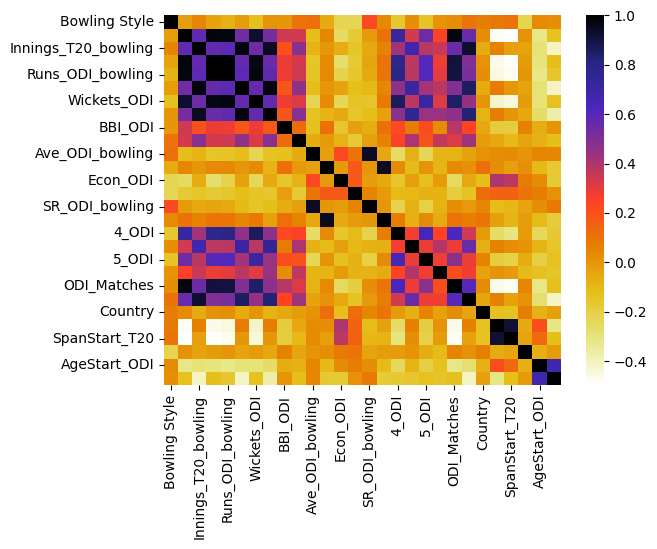

In [95]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [96]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [97]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [98]:
highly_correlated

['Balls_ODI',
 'Runs_ODI_bowling',
 'Runs_T20_bowling',
 'Wickets_ODI',
 'Wickets_T20',
 'SR_ODI_bowling',
 'SR_T20_bowling',
 '4_ODI',
 'ODI_Matches',
 'T20_Matches',
 'SpanStart_T20']

In [99]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [102]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [103]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [104]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [105]:
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 974.3088221981163
Random Forest R^2 Score: -1.0348493223682484


In [106]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [107]:
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print(np.mean(scores))

-0.3506643583346583


##### Inferencing with Shap

In [108]:
import shap

In [109]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

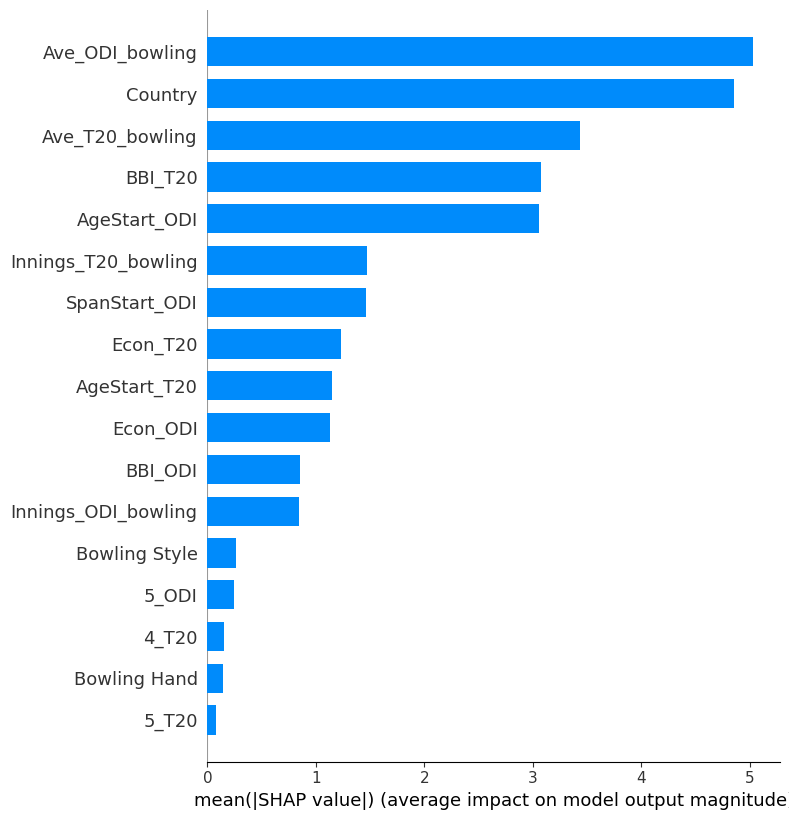

In [110]:
# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

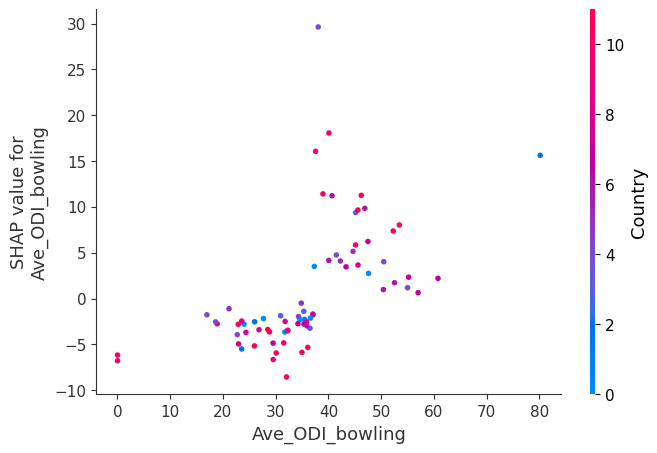

In [112]:
# Plot SHAP dependence plot for a specific feature
shap.dependence_plot("Ave_ODI_bowling", shap_values, X_test) 

##### Hyperparameter Tuning

In [113]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [116]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [117]:
rf = RandomForestRegressor()

In [118]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [119]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [120]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [121]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    # Evaluate the model
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mse))
    print('R2 = {:0.4f}'.format(r2))
    
    return r2

In [122]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 974.3088 degrees.
R2 = -1.0348


In [123]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 616.0391 degrees.
R2 = -0.2866


In [124]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -72.31%.


Grid Search CV

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [127]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [128]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV]

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [129]:

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [130]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 581.8321 degrees.
R2 = -0.2152


## T20 Batting Average

In [131]:
t20_cols = [column for column in df_bowl.columns if "T20" in column and 'Ave_T20_bowling' != column] 

In [132]:
t20_cols

['Innings_T20_bowling',
 'Runs_T20_bowling',
 'Wickets_T20',
 'BBI_T20',
 'Econ_T20',
 'SR_T20_bowling',
 '4_T20',
 '5_T20',
 'T20_Matches',
 'SpanStart_T20',
 'AgeStart_T20']

In [133]:
# Dropping Bowling stats
df_bowl_t20 = df_bowl.drop(columns=t20_cols)

In [134]:
df_bowl_t20.columns

Index(['Player Name', 'Bowling Style', 'Innings_ODI_bowling',
       'Innings_Test_bowling', 'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling',
       'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_Test', 'BBI_ODI',
       'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling',
       'Econ_ODI', 'Econ_Test', 'SR_ODI_bowling', 'SR_Test_bowling', '4_ODI',
       '5_ODI', '5_Test', '10_Test', 'ODI_Matches', 'Test_Matches', 'Country',
       'SpanStart_ODI', 'SpanStart_Test', 'Bowling Hand', 'AgeStart_ODI',
       'AgeStart_Test'],
      dtype='object')

In [135]:
df_bowl_t20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player Name           361 non-null    object 
 1   Bowling Style         361 non-null    object 
 2   Innings_ODI_bowling   361 non-null    int64  
 3   Innings_Test_bowling  361 non-null    int64  
 4   Balls_ODI             361 non-null    int64  
 5   Balls_Test            361 non-null    int64  
 6   Runs_ODI_bowling      361 non-null    int64  
 7   Runs_Test_bowling     361 non-null    int64  
 8   Wickets_ODI           361 non-null    int64  
 9   Wickets_Test          361 non-null    int64  
 10  BBI_ODI               361 non-null    float64
 11  BBI_Test              361 non-null    float64
 12  Ave_ODI_bowling       361 non-null    float64
 13  Ave_T20_bowling       361 non-null    float64
 14  Ave_Test_bowling      361 non-null    float64
 15  Econ_ODI              3

In [136]:
num_features = [feature for feature in df_bowl_t20.columns if df_bowl_t20[feature].dtype != 'O']
print(num_features)
df_bowl_t20[num_features].head()

['Innings_ODI_bowling', 'Innings_Test_bowling', 'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling', 'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_Test', 'BBI_ODI', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling', 'Econ_ODI', 'Econ_Test', 'SR_ODI_bowling', 'SR_Test_bowling', '4_ODI', '5_ODI', '5_Test', '10_Test', 'ODI_Matches', 'Test_Matches', 'SpanStart_ODI', 'SpanStart_Test', 'AgeStart_ODI', 'AgeStart_Test']


,Innings_ODI_bowling,Innings_Test_bowling,Balls_ODI,Balls_Test,Runs_ODI_bowling,Runs_Test_bowling,Wickets_ODI,Wickets_Test,BBI_ODI,BBI_Test,...,4_ODI,5_ODI,5_Test,10_Test,ODI_Matches,Test_Matches,SpanStart_ODI,SpanStart_Test,AgeStart_ODI,AgeStart_Test
0,38,12,1995,1385,1715,819,58,33,0.206897,0.052174,...,2,2,4,0,40,6,2012,2018,18.819178,24.819178
1,34,40,1917,5103,1511,2715,64,76,0.125000,0.070423,...,2,2,1,0,36,22,2003,2008,20.679452,25.679452
2,2,2,102,420,80,277,1,2,0.034483,0.011765,...,0,0,0,0,2,2,2019,2020,23.506849,24.506849
3,76,69,3801,7630,2935,3919,106,123,0.111111,0.187500,...,3,1,3,1,79,36,2001,2001,24.038356,24.038356
4,21,32,1006,3057,982,1870,36,70,0.078431,0.107143,...,3,0,4,0,22,19,2019,2019,25.701370,25.701370


#### Discrete Features

In [137]:
discrete_features = [feature for feature in num_features if len(df_bowl_t20[feature].unique()) < 25]
print(discrete_features)

['4_ODI', '5_ODI', '5_Test', '10_Test']


4_ODI
0     0.404432
1     0.180055
2     0.130194
3     0.102493
4     0.063712
5     0.036011
6     0.024931
7     0.016620
8     0.008310
9     0.005540
10    0.013850
11    0.008310
12    0.002770
14    0.002770
Name: Ave_T20_bowling, dtype: float64
4_ODI
0     146
1      65
2      47
3      37
4      23
5      13
6       9
7       6
10      5
8       3
11      3
9       2
14      1
12      1
Name: count, dtype: int64


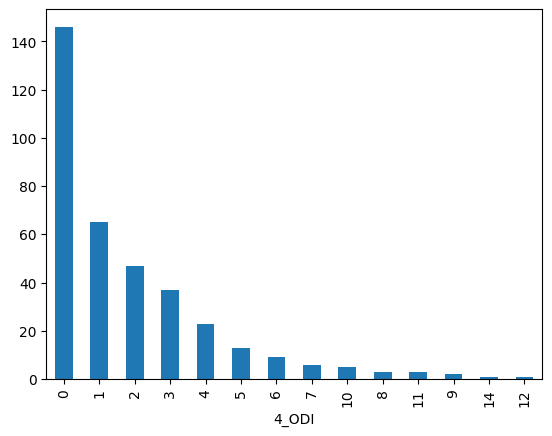

5_ODI
0    0.634349
1    0.216066
2    0.091413
3    0.027701
4    0.013850
5    0.005540
6    0.002770
8    0.002770
9    0.005540
Name: Ave_T20_bowling, dtype: float64
5_ODI
0    229
1     78
2     33
3     10
4      5
9      2
5      2
8      1
6      1
Name: count, dtype: int64


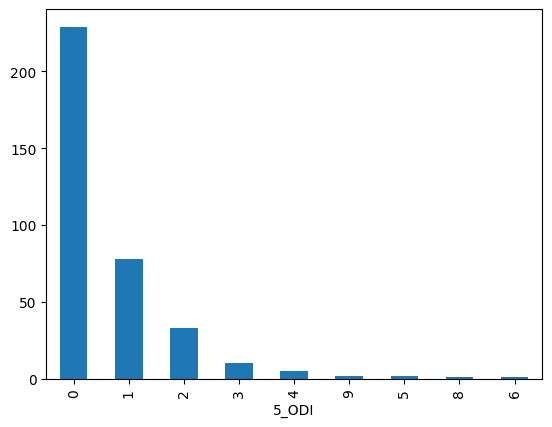

5_Test
0     0.537396
1     0.166205
2     0.074792
3     0.038781
4     0.044321
5     0.033241
6     0.011080
7     0.005540
8     0.011080
9     0.005540
10    0.013850
11    0.005540
12    0.016620
13    0.005540
14    0.005540
15    0.002770
16    0.002770
17    0.002770
19    0.002770
20    0.002770
24    0.002770
32    0.002770
34    0.002770
36    0.002770
Name: Ave_T20_bowling, dtype: float64
5_Test
0     194
1      60
2      27
4      16
3      14
5      12
12      6
10      5
8       4
6       4
13      2
9       2
14      2
7       2
11      2
32      1
34      1
24      1
36      1
17      1
20      1
19      1
15      1
16      1
Name: count, dtype: int64


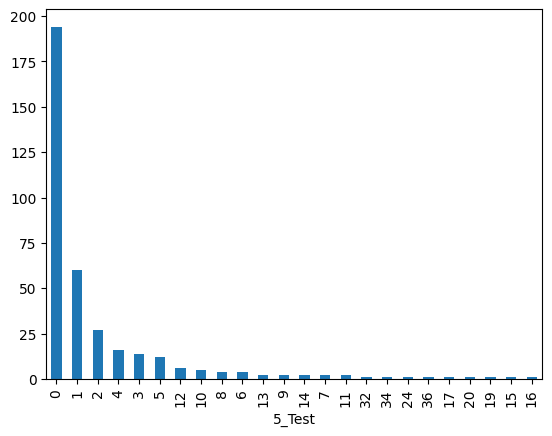

10_Test
0    0.869806
1    0.074792
2    0.027701
3    0.013850
4    0.005540
5    0.002770
8    0.002770
9    0.002770
Name: Ave_T20_bowling, dtype: float64
10_Test
0    314
1     27
2     10
3      5
4      2
9      1
5      1
8      1
Name: count, dtype: int64


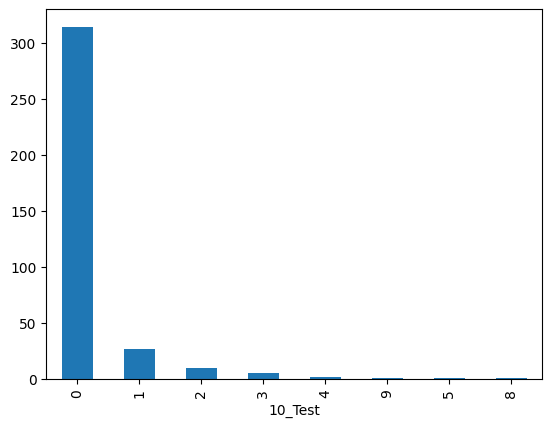

In [138]:
for feature in discrete_features:
    data = df_bowl_t20.copy() 
    print(data.groupby(feature)['Ave_T20_bowling'].count() / len(data))
    print(data[feature].value_counts())
    data[feature].value_counts().plot.bar()
    plt.show()

4_ODI
0     0.371193
1     0.190993
2     0.140743
3     0.122706
4     0.059250
5     0.034844
6     0.024562
7     0.015367
8     0.008499
9     0.004728
10    0.013410
11    0.008396
12    0.002564
14    0.002746
Name: Ave_T20_bowling, dtype: float64


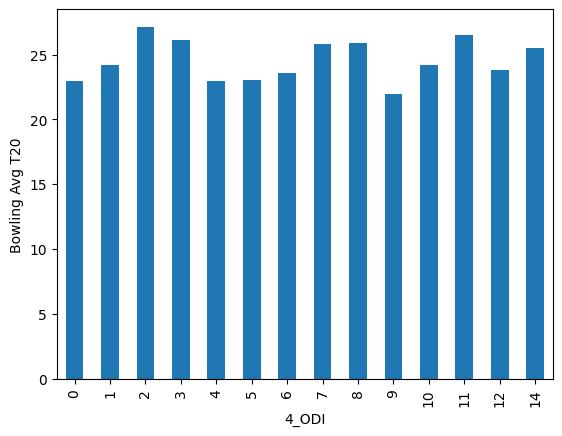

5_ODI
0    0.616879
1    0.231174
2    0.099060
3    0.026597
4    0.010947
5    0.005486
6    0.002308
8    0.002239
9    0.005311
Name: Ave_T20_bowling, dtype: float64


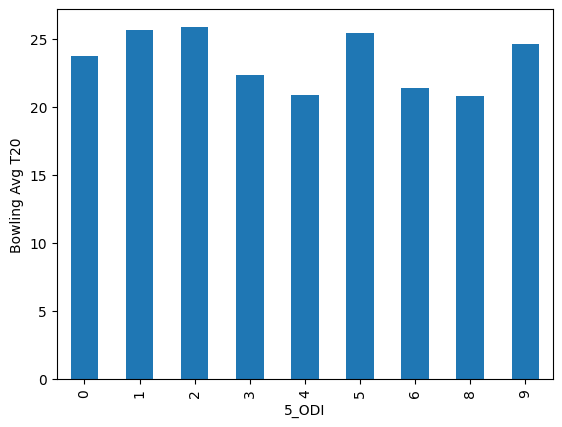

5_Test
0     0.547545
1     0.158792
2     0.075635
3     0.034713
4     0.042576
5     0.032747
6     0.011438
7     0.003799
8     0.013053
9     0.006562
10    0.011854
11    0.008444
12    0.018921
13    0.006284
14    0.005488
15    0.002410
16    0.000000
17    0.001814
19    0.002252
20    0.002470
24    0.005170
32    0.003302
34    0.002232
36    0.002501
Name: Ave_T20_bowling, dtype: float64


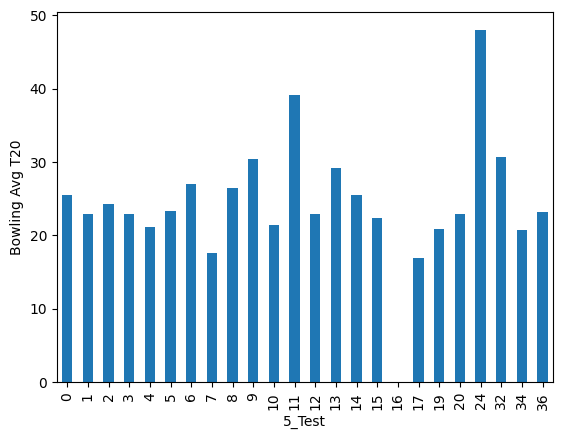

10_Test
0    0.867881
1    0.076569
2    0.030960
3    0.009844
4    0.004844
5    0.005170
8    0.002501
9    0.002232
Name: Ave_T20_bowling, dtype: float64


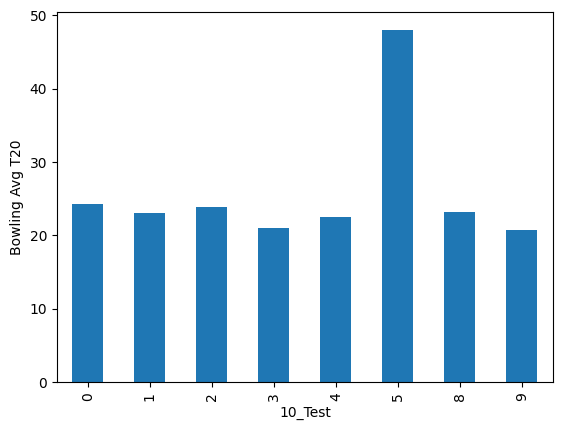

In [139]:
for feature in discrete_features:
    data = df_bowl_t20.copy()
    
    print(data.groupby(feature)['Ave_T20_bowling'].sum() / data['Ave_T20_bowling'].sum())
    data.groupby(feature)['Ave_T20_bowling'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Bowling Avg T20')
    plt.show()

#### Continuous Features

In [140]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(continuous_features)

['Innings_ODI_bowling', 'Innings_Test_bowling', 'Balls_ODI', 'Balls_Test', 'Runs_ODI_bowling', 'Runs_Test_bowling', 'Wickets_ODI', 'Wickets_Test', 'BBI_ODI', 'BBI_Test', 'Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling', 'Econ_ODI', 'Econ_Test', 'SR_ODI_bowling', 'SR_Test_bowling', 'ODI_Matches', 'Test_Matches', 'SpanStart_ODI', 'SpanStart_Test', 'AgeStart_ODI', 'AgeStart_Test']


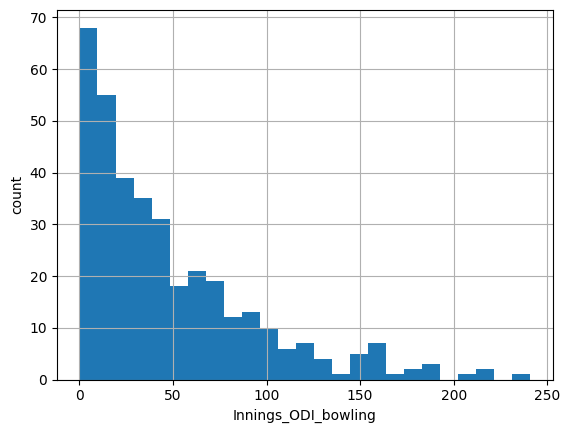

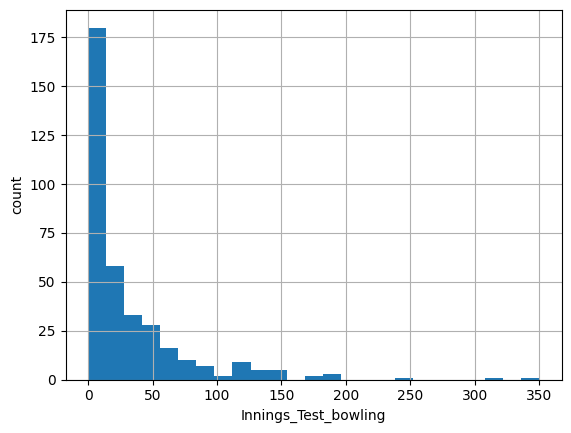

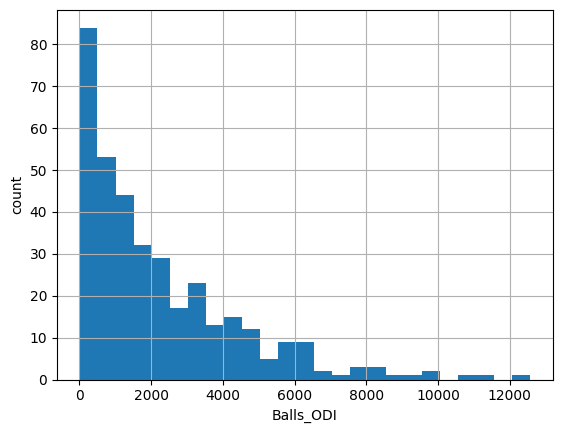

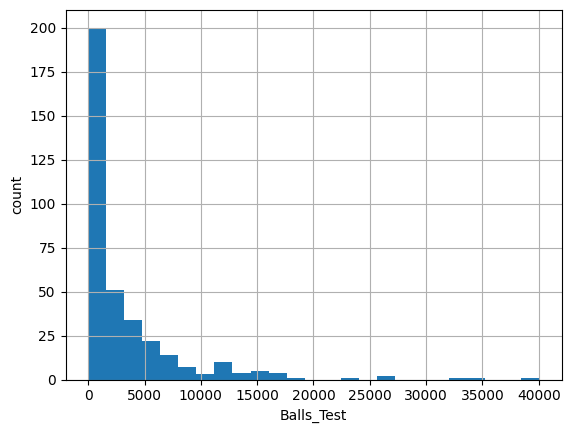

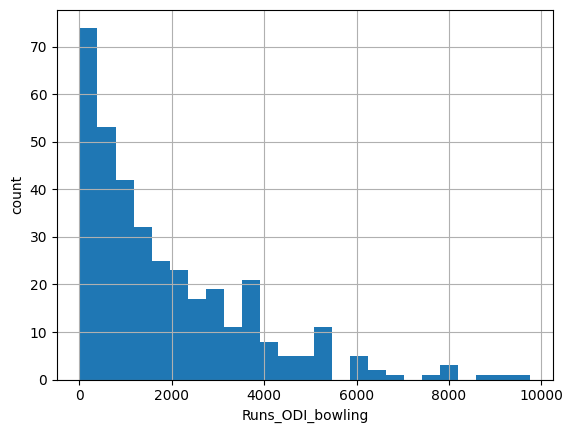

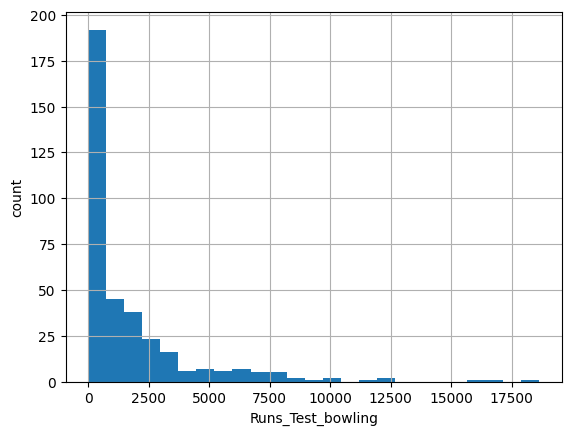

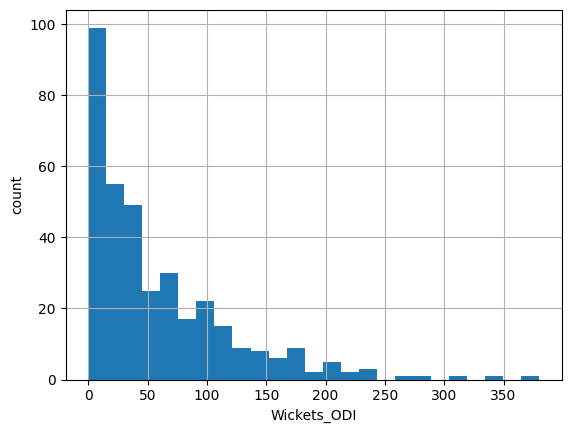

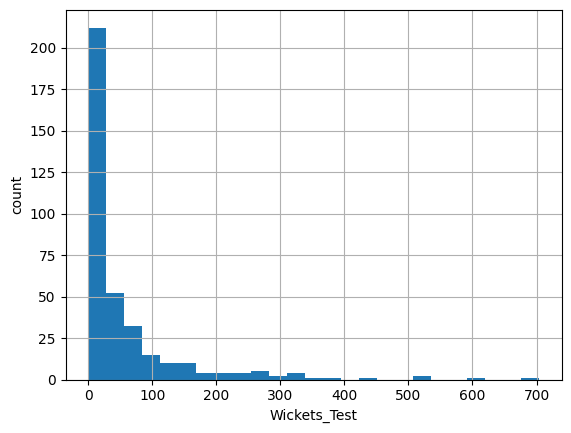

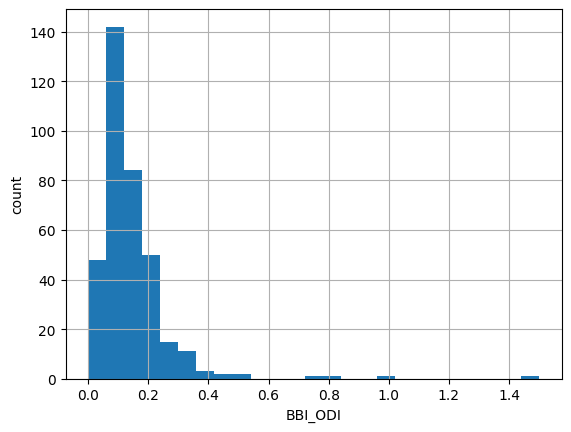

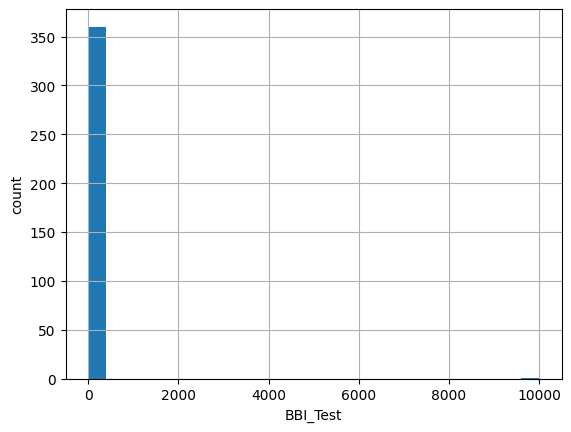

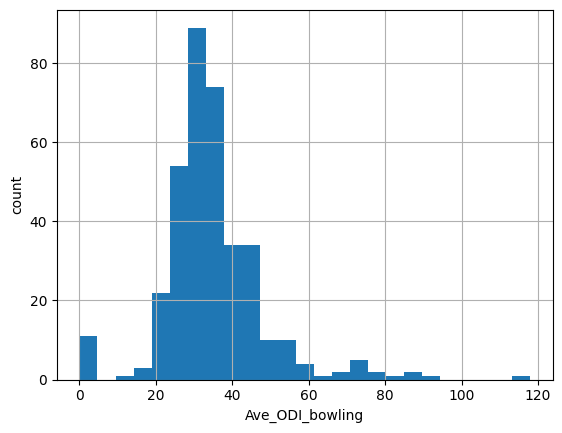

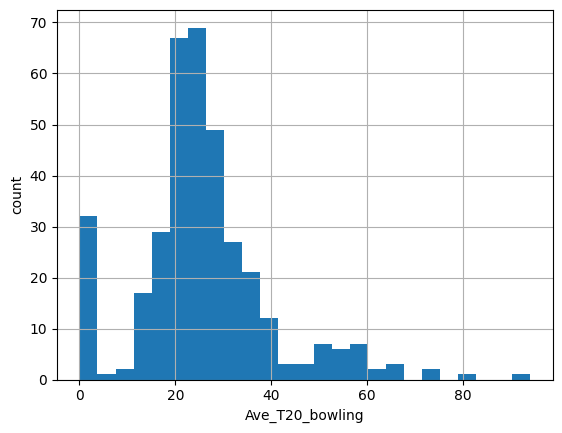

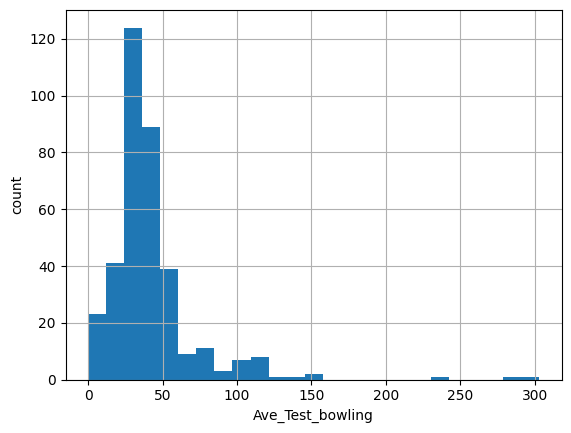

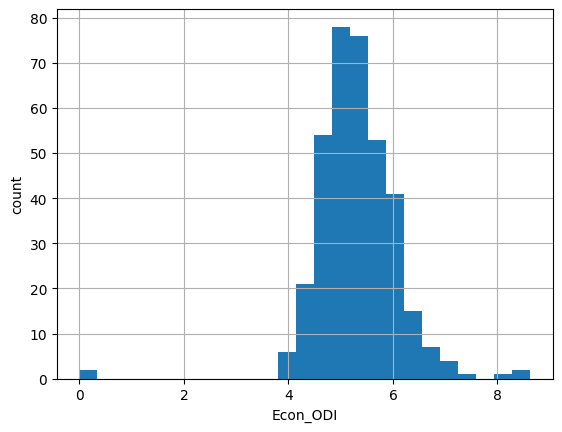

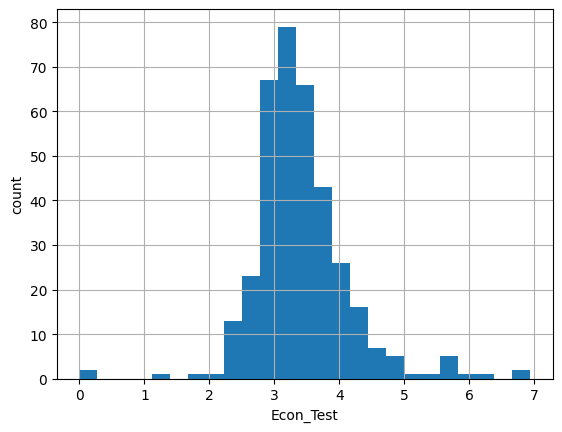

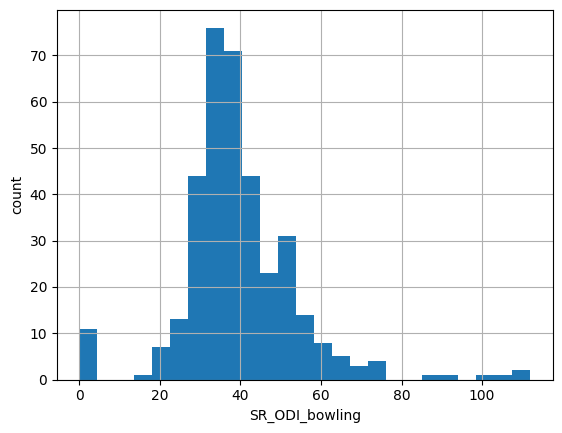

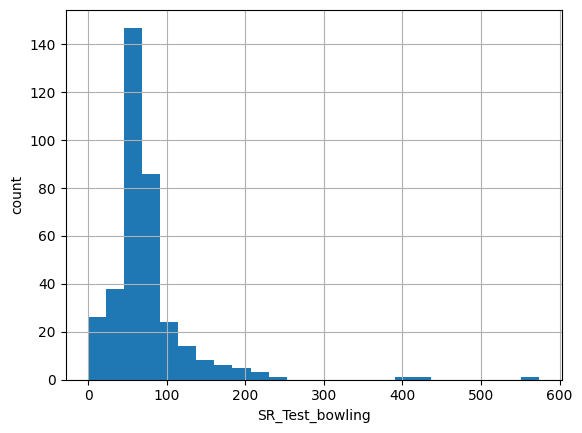

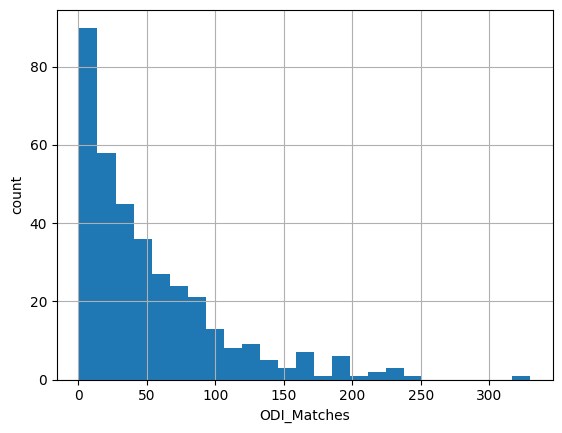

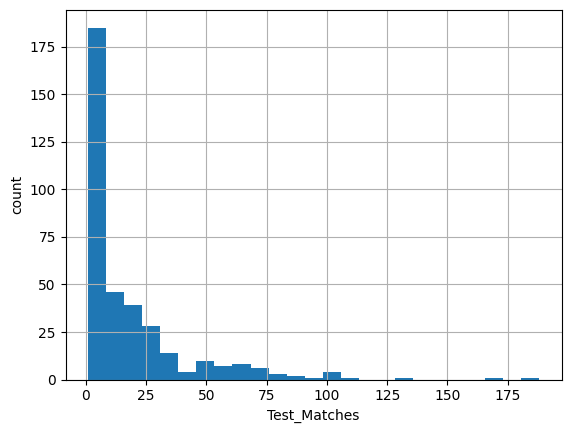

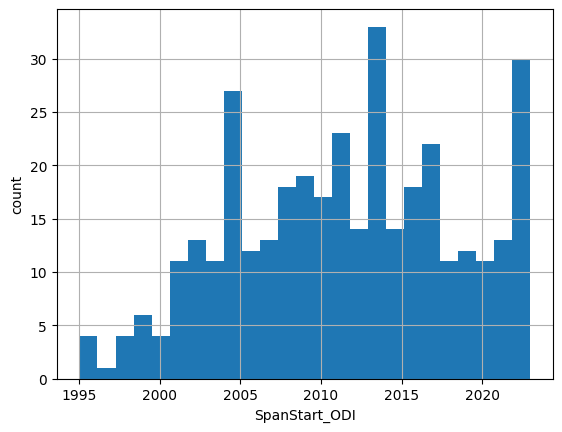

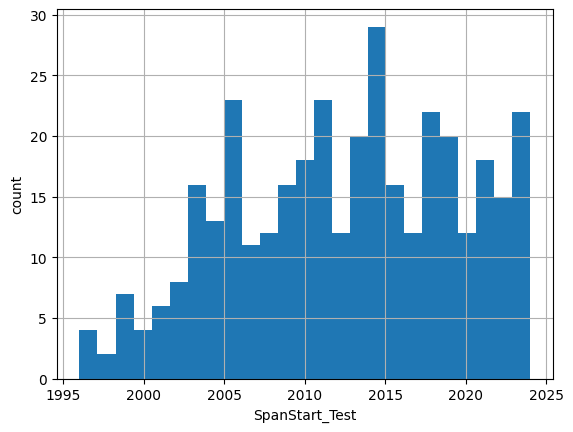

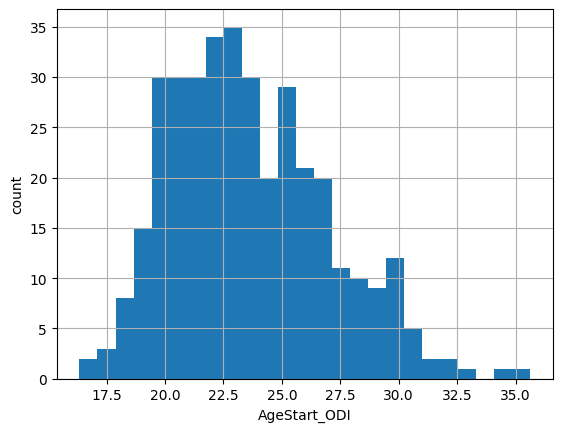

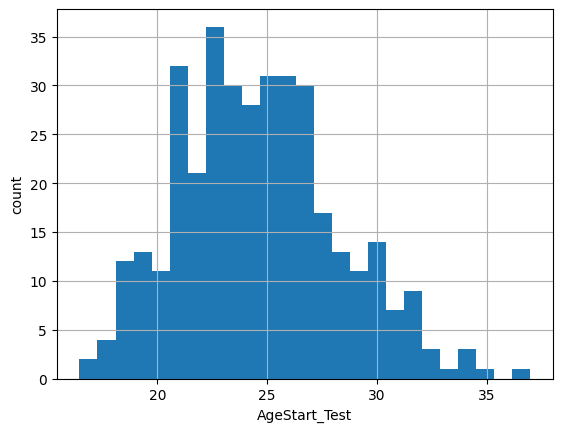

In [142]:
for feature in continuous_features:
    data = df_bowl_t20.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

#### Categorical Features

In [143]:
cat_features = [feature for feature in df_bowl_t20.columns if feature not in num_features]
df_bowl_t20[cat_features].head()

,Player Name,Bowling Style,Country,Bowling Hand
0,A Dananjaya,Spinner,SL,Right Hand
1,A Mishra,Spinner,IND,Right Hand
2,A Ndlovu,Spinner,ZIM,Left Hand
3,A Nel,Pacer,SA,Right Hand
4,A Nortje,Pacer,SA,Right Hand


In [144]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df_bowl_t20[feature].unique())))

Player Name: 361 categories
Bowling Style: 2 categories
Country: 12 categories
Bowling Hand: 2 categories


In [145]:
cat_features.remove('Player Name')

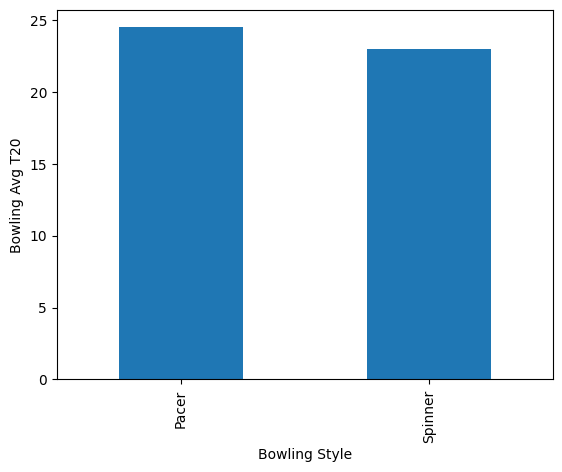

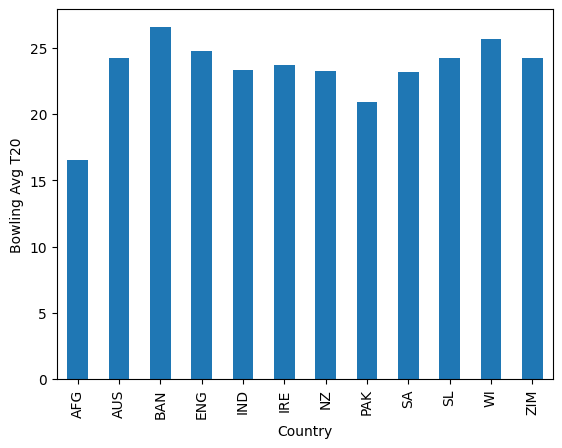

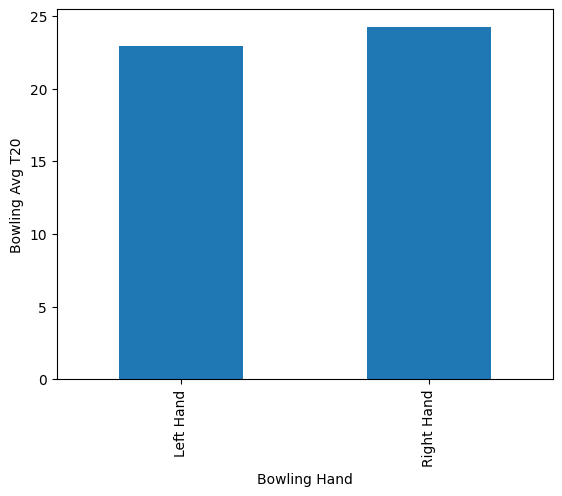

In [146]:
## relationship with Avg Runs

for feature in cat_features:
    data = df_bowl_t20.copy()
    
    data.groupby(feature)['Ave_T20_bowling'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Bowling Avg T20')
    plt.show()

#### Feature Engineering

In [147]:
dataset = df_bowl_t20.copy()
dataset.head()

,Player Name,Bowling Style,Innings_ODI_bowling,Innings_Test_bowling,Balls_ODI,Balls_Test,Runs_ODI_bowling,Runs_Test_bowling,Wickets_ODI,Wickets_Test,...,5_Test,10_Test,ODI_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,Bowling Hand,AgeStart_ODI,AgeStart_Test
0,A Dananjaya,Spinner,38,12,1995,1385,1715,819,58,33,...,4,0,40,6,SL,2012,2018,Right Hand,18.819178,24.819178
1,A Mishra,Spinner,34,40,1917,5103,1511,2715,64,76,...,1,0,36,22,IND,2003,2008,Right Hand,20.679452,25.679452
2,A Ndlovu,Spinner,2,2,102,420,80,277,1,2,...,0,0,2,2,ZIM,2019,2020,Left Hand,23.506849,24.506849
3,A Nel,Pacer,76,69,3801,7630,2935,3919,106,123,...,3,1,79,36,SA,2001,2001,Right Hand,24.038356,24.038356
4,A Nortje,Pacer,21,32,1006,3057,982,1870,36,70,...,4,0,22,19,SA,2019,2019,Right Hand,25.701370,25.701370


##### Converting Categorical features to Numerical features

In [148]:
for feature in cat_features:
    ordinal_labels = dataset.groupby(feature)['Ave_T20_bowling'].max().sort_values().index
    ordinal_dict = {k:i for i, k in enumerate(ordinal_labels, 0)}
    print(ordinal_dict)
    dataset[feature] = df_bowl_odi[feature].map(ordinal_dict)

{'Spinner': 0, 'Pacer': 1}
{'AFG': 0, 'IRE': 1, 'SA': 2, 'AUS': 3, 'IND': 4, 'NZ': 5, 'ENG': 6, 'SL': 7, 'WI': 8, 'PAK': 9, 'BAN': 10, 'ZIM': 11}
{'Left Hand': 0, 'Right Hand': 1}


In [149]:
dataset.drop(['Player Name'], axis = 1, inplace = True)
dataset.head()

,Bowling Style,Innings_ODI_bowling,Innings_Test_bowling,Balls_ODI,Balls_Test,Runs_ODI_bowling,Runs_Test_bowling,Wickets_ODI,Wickets_Test,BBI_ODI,...,5_Test,10_Test,ODI_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,Bowling Hand,AgeStart_ODI,AgeStart_Test
0,0,38,12,1995,1385,1715,819,58,33,0.206897,...,4,0,40,6,7,2012,2018,1,18.819178,24.819178
1,0,34,40,1917,5103,1511,2715,64,76,0.125000,...,1,0,36,22,4,2003,2008,1,20.679452,25.679452
2,0,2,2,102,420,80,277,1,2,0.034483,...,0,0,2,2,11,2019,2020,0,23.506849,24.506849
3,1,76,69,3801,7630,2935,3919,106,123,0.111111,...,3,1,79,36,2,2001,2001,1,24.038356,24.038356
4,1,21,32,1006,3057,982,1870,36,70,0.078431,...,4,0,22,19,2,2019,2019,1,25.701370,25.701370


In [151]:
dataset.to_csv('Data/Final/t20_bowl_processed_data.csv', index = False)

#### Modelling

In [152]:
df = pd.read_csv('Data/Final/t20_bowl_processed_data.csv')
df.head()

,Bowling Style,Innings_ODI_bowling,Innings_Test_bowling,Balls_ODI,Balls_Test,Runs_ODI_bowling,Runs_Test_bowling,Wickets_ODI,Wickets_Test,BBI_ODI,...,5_Test,10_Test,ODI_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,Bowling Hand,AgeStart_ODI,AgeStart_Test
0,0,38,12,1995,1385,1715,819,58,33,0.206897,...,4,0,40,6,7,2012,2018,1,18.819178,24.819178
1,0,34,40,1917,5103,1511,2715,64,76,0.125000,...,1,0,36,22,4,2003,2008,1,20.679452,25.679452
2,0,2,2,102,420,80,277,1,2,0.034483,...,0,0,2,2,11,2019,2020,0,23.506849,24.506849
3,1,76,69,3801,7630,2935,3919,106,123,0.111111,...,3,1,79,36,2,2001,2001,1,24.038356,24.038356
4,1,21,32,1006,3057,982,1870,36,70,0.078431,...,4,0,22,19,2,2019,2019,1,25.701370,25.701370


In [153]:
X = df.drop('Ave_T20_bowling', axis = 1)

In [154]:
y = df['Ave_T20_bowling']

##### Dropping with correlation

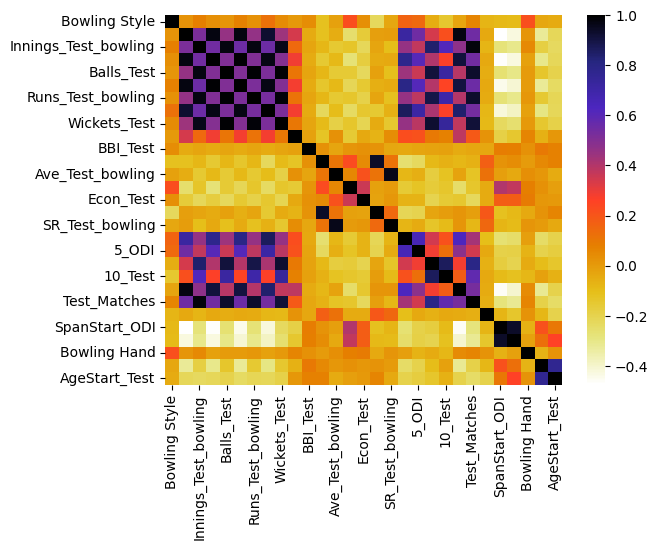

In [155]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [156]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [157]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [158]:
highly_correlated

['Balls_ODI',
 'Balls_Test',
 'Runs_ODI_bowling',
 'Runs_Test_bowling',
 'Wickets_ODI',
 'Wickets_Test',
 'SR_ODI_bowling',
 'SR_Test_bowling',
 '4_ODI',
 '5_Test',
 '10_Test',
 'ODI_Matches',
 'Test_Matches',
 'SpanStart_Test']

In [159]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [162]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [163]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [164]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [165]:
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 216.02555811904105
Random Forest R^2 Score: -0.030714565680762362


In [166]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [167]:
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print(np.mean(scores))

-0.18140178698521797


##### Inferencing with Shap

In [168]:
import shap

In [169]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

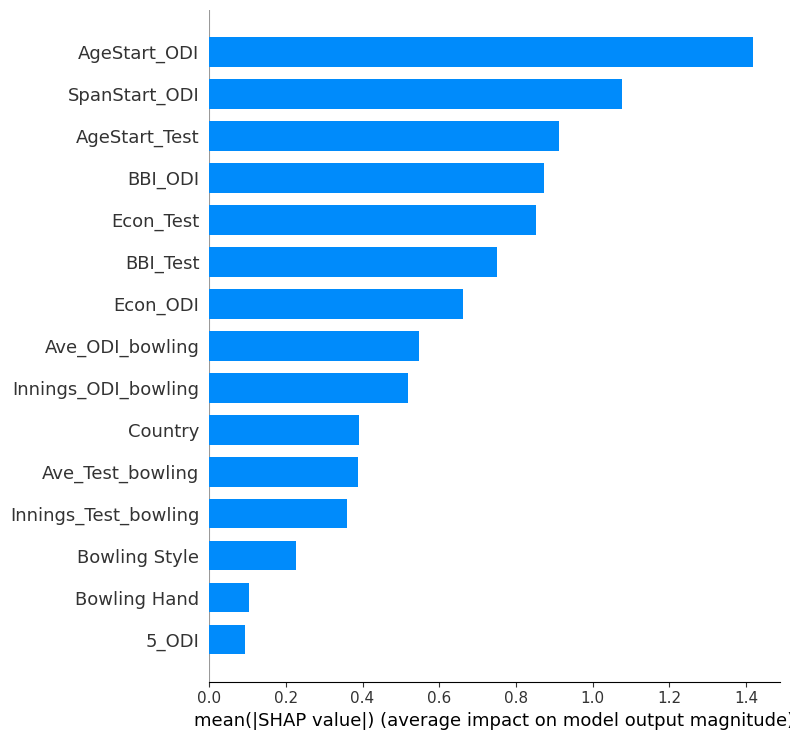

In [170]:
# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

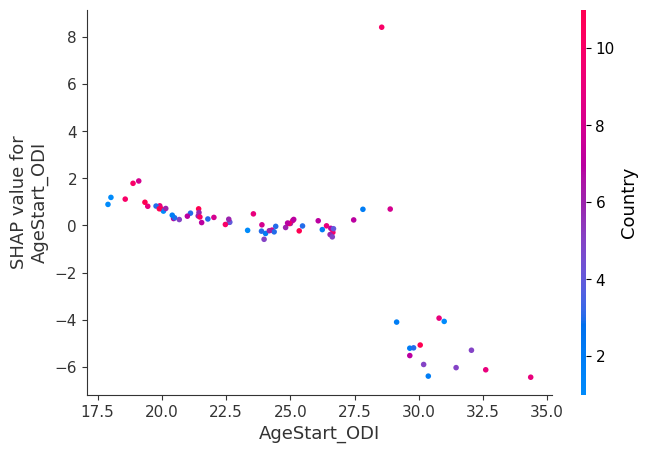

In [171]:
# Plot SHAP dependence plot for a specific feature
shap.dependence_plot("AgeStart_ODI", shap_values, X_test) 

##### Hyperparameter Tuning

In [172]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [175]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [176]:
rf = RandomForestRegressor()

In [177]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [178]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [179]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [180]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    # Evaluate the model
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mse))
    print('R2 = {:0.4f}'.format(r2))
    
    return r2

In [181]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 216.0256 degrees.
R2 = -0.0307


In [182]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 203.7777 degrees.
R2 = 0.0277


In [183]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -190.26%.


Grid Search CV

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [186]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [187]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [188]:

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [189]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 202.3162 degrees.
R2 = 0.0347


## Final MSE and R2 Metrics

| Match Type | MSE                     | R²                   | R² (RandomizedSearch) | R² (Grid Search) |
|------------|------------------------|------------------------|-----------------------|------------------|
| ODI        |   143.129 |   0.1073|   0.0888|   0.0508|
| Test       |   974.308|    -1.0348|-0.2866|   -0.2152|
| T20        |   216.025 |   -0.0307|  0.0277|  0.0347|